## Tanpa SPPG

In [1]:
import pandas as pd
from functools import reduce

# Load datasets
kemiskinan = pd.read_excel('kemiskinan.xlsx')
sekolah = pd.read_excel('Sekolah.xlsx')
anak_sekolah = pd.read_excel('JumlahAnakSekolah.xlsx')
IKP = pd.read_excel('IndeksKetahananPangan.xlsx')

# Print shape of each dataset to understand dimensions
print("Kemiskinan shape:", kemiskinan.shape)
print("Sekolah shape:", sekolah.shape)
print("Anak Sekolah shape:", anak_sekolah.shape)
print("IKP shape:", IKP.shape)

# Metode penggabungan secara sequential tanpa SPPG
df_merged = kemiskinan.merge(
    sekolah, on='Kode Wilayah', how='outer', suffixes=('_kemiskinan', '_sekolah')
).merge(
    anak_sekolah, on='Kode Wilayah', how='outer', suffixes=('', '_anak_sekolah')
).merge(
    IKP, on='Kode Wilayah', how='outer', suffixes=('', '_ikp')
)

# Periksa hasil penggabungan awal
print("\nHasil penggabungan awal:", df_merged.shape)

# Tampilkan semua kolom untuk memastikan penamaan kolom sudah benar
print("\nDaftar semua kolom:")
for col in df_merged.columns:
    print(col)

# Simpan hasil gabungan
df_merged.to_excel('Data_Gabungan_Clean.xlsx', index=False)

# Tampilkan sebagian dataset gabungan
print("\nSample dataset gabungan:")
df_merged.head()

Kemiskinan shape: (540, 4)
Sekolah shape: (540, 5)
Anak Sekolah shape: (540, 5)
IKP shape: (540, 3)

Hasil penggabungan awal: (540, 14)

Daftar semua kolom:
Kode Wilayah
Nama Wilayah_kemiskinan
Persentase_Penduduk_Miskin
Indeks_Kedalaman_Kemiskinan
Nama Wilayah_sekolah
Total_Jumlah
SD_Jumlah
SMP_Jumlah
Nama Wilayah
Total_LP
SD_LP
SMP_LP
Nama Wilayah_ikp
IKP

Sample dataset gabungan:


Kode Wilayah Nama Wilayah_kemiskinan  Persentase_Penduduk_Miskin  \
0          1101                Simeulue                       17.69   
1          1102            Aceh Singkil                       19.06   
2          1103            Aceh Selatan                       12.02   
3          1104           Aceh Tenggara                       11.99   
4          1105              Aceh Timur                       13.26   

   Indeks_Kedalaman_Kemiskinan Nama Wilayah_sekolah  Total_Jumlah  SD_Jumlah  \
0                         2.62             Simeulue           344        115   
1                         3.06         Aceh Singkil           343        113   
2                         1.57         Aceh Selatan           707        206   
3                         1.64        Aceh Tenggara           625        187   
4                         2.04           Aceh Timur           815        293   

   SMP_Jumlah   Nama Wilayah  Total_LP  SD_LP  SMP_LP Nama Wilayah_ikp    IKP  
0          46       Simeulue     20919   9672     396         Simeulue  77.54  
1          54   Aceh Singkil     34127  16956    7045     Aceh Singkil  46.10  
2          63   Aceh Selatan      4855  19993     896     Aceh Selatan  73.84  
3          87  Aceh Tenggara     53593  24297   11048    Aceh Tenggara  76.87  
4          87     Aceh Timur     94202  45045   15205       Aceh Timur  77.19

In [2]:
# Cek Duplikat (Kode Wilayah yang punya lebih dari satu Nama Wilayah)
duplikat_nama = df_merged.groupby('Kode Wilayah')['Nama Wilayah'].nunique()
duplikat_nama = duplikat_nama[duplikat_nama > 1]

# Tampilkan daftar duplikat tersebut
print("\nKode Wilayah dengan nama wilayah berbeda-beda:")
print(duplikat_nama)


Kode Wilayah dengan nama wilayah berbeda-beda:
Series([], Name: Nama Wilayah, dtype: int64)


In [3]:
import pandas as pd
import numpy as np

# 1. Ganti semua 0 jadi NaN biar bisa dihapus sekaligus dengan dropna
df_merged = df_merged.replace(0, np.nan)
missing_values = df_merged.isnull().sum()
print(f"Jumlah missing values tiap kolom\n", missing_values)

baris_missing = df_merged[df_merged.isnull().any(axis=1)]
print(f"Wilayah dengan missing value:\n")
baris_missing.head()

Jumlah missing values tiap kolom
 Kode Wilayah                    0
Nama Wilayah_kemiskinan         0
Persentase_Penduduk_Miskin     26
Indeks_Kedalaman_Kemiskinan    26
Nama Wilayah_sekolah            0
Total_Jumlah                   26
SD_Jumlah                      26
SMP_Jumlah                     26
Nama Wilayah                    0
Total_LP                       29
SD_LP                          29
SMP_LP                         29
Nama Wilayah_ikp                0
IKP                            26
dtype: int64
Wilayah dengan missing value:



Kode Wilayah Nama Wilayah_kemiskinan  Persentase_Penduduk_Miskin  \
317          6104               Pontianak                        4.83   
449          7605            Mamuju Utara                        5.21   
451          8101   Maluku Tenggara Barat                       23.66   
477          9106          Sorong Selatan                         NaN   
478          9107                  Sorong                         NaN   

     Indeks_Kedalaman_Kemiskinan   Nama Wilayah_sekolah  Total_Jumlah  \
317                         0.49              Pontianak         630.0   
449                         0.66           Mamuju Utara         367.0   
451                         4.23  Maluku Tenggara Barat         347.0   
477                          NaN         Sorong Selatan           NaN   
478                          NaN                 Sorong           NaN   

     SD_Jumlah  SMP_Jumlah           Nama Wilayah  Total_LP  SD_LP  SMP_LP  \
317      171.0        78.0              Pontianak       NaN    NaN     NaN   
449      136.0        54.0           Mamuju Utara       NaN    NaN     NaN   
451      121.0        66.0  Maluku Tenggara Barat       NaN    NaN     NaN   
477        NaN         NaN         Sorong Selatan       NaN    NaN     NaN   
478        NaN         NaN                 Sorong       NaN    NaN     NaN   

       Nama Wilayah_ikp    IKP  
317            Mempawah  73.85  
449        Mamuju Utara  57.34  
451  Kepulauan Tanimbar  49.94  
477      Sorong Selatan  40.39  
478              Sorong  50.88

In [4]:
# 2. Remove all records with missing measurements
df_cleaned = df_merged.dropna()
missing_values = df_cleaned.isnull().sum()
print(f"\nJumlah missing values tiap kolom setelah penghapusan\n", missing_values)


Jumlah missing values tiap kolom setelah penghapusan
 Kode Wilayah                   0
Nama Wilayah_kemiskinan        0
Persentase_Penduduk_Miskin     0
Indeks_Kedalaman_Kemiskinan    0
Nama Wilayah_sekolah           0
Total_Jumlah                   0
SD_Jumlah                      0
SMP_Jumlah                     0
Nama Wilayah                   0
Total_LP                       0
SD_LP                          0
SMP_LP                         0
Nama Wilayah_ikp               0
IKP                            0
dtype: int64


In [5]:
# Install package factor_analyzer
!pip install factor_analyzer

# Sekarang lakukan analisis multikolinearitas dan KMO pada df_cleaned
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from factor_analyzer.factor_analyzer import calculate_kmo


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=799337fefd9c89b4322e1eeae3729bb94d6d80e72781c21b4681d192d0b3ec0b
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


In [8]:
# Pilih kolom numerik yang ingin dianalisis untuk multikolinearitas dan KMO
features = [
    'Persentase_Penduduk_Miskin',
    'Total_Jumlah',      # Jumlah Sekolah
    'SD_Jumlah',
    'SMP_Jumlah',
    'SMA_Jumlah',
    'Total_LP',          # Jumlah Anak Usia Sekolah
    'SD_LP',
    'SMP_LP',
    'SMA_LP',
    'IKP'                # Indeks Ketahanan Pangan
]

# Cek multikolinearitas dengan VIF
def check_multicollinearity(df, features):
    vif_data = pd.DataFrame()
    vif_data["Variabel"] = features

    # Menghitung VIF untuk setiap fitur
    X = df[features].values
    vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(len(features))]

    return vif_data

# Menghitung dan menampilkan VIF
try:
    vif_results = check_multicollinearity(df_cleaned, features)
    print("\nHasil Uji Multikolinearitas (VIF):")
    print(vif_results)
    print("\nInterpretasi VIF:")
    print("- VIF > 10: Indikasi multikolinearitas tinggi")
    print("- VIF > 5: Indikasi multikolinearitas moderat")
    print("- VIF < 5: Multikolinearitas rendah")
except Exception as e:
    print(f"Error saat menghitung VIF: {e}")

# Uji KMO (Kaiser-Meyer-Olkin)
try:
    # Menghitung KMO untuk mengecek kecukupan sampling
    kmo_all, kmo_model = calculate_kmo(df_cleaned[features])

    print("\nHasil Uji KMO:")
    print(f"KMO total: {kmo_model:.3f}")

    # Menampilkan KMO untuk masing-masing variabel
    kmo_per_variable = pd.DataFrame({
        'Variabel': features,
        'KMO': kmo_all
    })
    print("\nKMO per variabel:")
    print(kmo_per_variable)

    print("\nInterpretasi KMO:")
    print("- KMO > 0.9: Sangat baik")
    print("- KMO 0.8-0.9: Baik")
    print("- KMO 0.7-0.8: Cukup")
    print("- KMO 0.6-0.7: Sedang")
    print("- KMO 0.5-0.6: Buruk")
    print("- KMO < 0.5: Tidak dapat diterima")

except Exception as e:
    print(f"\nError saat menghitung KMO: {e}")
    print("Pastikan factor_analyzer terinstal. Jika belum, instal dengan: pip install factor_analyzer")

# Tambahan: Matriks korelasi untuk melihat hubungan antar variabel
correlation_matrix = df_cleaned[features].corr()
print("\nMatriks Korelasi:")
print(correlation_matrix)


Hasil Uji Multikolinearitas (VIF):
                     Variabel        VIF
0  Persentase_Penduduk_Miskin   3.564927
1                Total_Jumlah  18.876988
2                   SD_Jumlah  14.313275
3                  SMP_Jumlah  16.622371
4                    Total_LP   9.117786
5                       SD_LP   7.178859
6                      SMP_LP   8.813889
7                         IKP   5.069342

Interpretasi VIF:
- VIF > 10: Indikasi multikolinearitas tinggi
- VIF > 5: Indikasi multikolinearitas moderat
- VIF < 5: Multikolinearitas rendah

Hasil Uji KMO:
KMO total: 0.895

KMO per variabel:
                     Variabel       KMO
0  Persentase_Penduduk_Miskin  0.577742
1                Total_Jumlah  0.882108
2                   SD_Jumlah  0.894232
3                  SMP_Jumlah  0.917043
4                    Total_LP  0.913335
5                       SD_LP  0.949877
6                      SMP_LP  0.916297
7                         IKP  0.708739

Interpretasi KMO:
- KMO > 0.9: Sang

In [9]:
# Menampilkan jumlah entri sebelum handling missing value
print("Sebelum handling missing value:", len(df_merged), "entries")

# Menampilkan jumlah entri setelah handling missing value
print("Setelah handling missing value:", len(df_cleaned), "entries")

Sebelum handling missing value: 540 entries
Setelah handling missing value: 485 entries


In [10]:
# Daftar kolom yang ingin dikecualikan (kolom nama wilayah)
exclude_cols = ['Nama Wilayah_kemiskinan', 'Nama Wilayah_sekolah', 'Nama Wilayah', 'Nama Wilayah_ikp']

# Ubah semua kolom kecuali yang dikecualikan menjadi numerik
for col in df_cleaned.columns:
    if col not in exclude_cols:
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

<ipython-input-10-8bcdd236d002>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')


In [12]:
# Membuat statistik deskriptif dari data yang sudah dibersihkan
stats_deskriptif = df_cleaned.describe()

# Mengambil hanya min, max, mean, dan standar deviasi
stats_deskriptif = stats_deskriptif.loc[['min', 'max', 'mean', 'std']]

# Mengubah format untuk memudahkan copy-paste ke dalam tabel
formatted_stats = stats_deskriptif.round(2)  # Bulatkan ke 2 desimal

# Mencetak dalam format yang mudah disalin
print("\nStatistik Deskriptif untuk Copy-Paste ke Tabel:\n")
for kolom in formatted_stats.columns:
    print(f"Kolom: {kolom}")
    print(f"Minimum: {formatted_stats.loc['min', kolom]}")
    print(f"Maksimum: {formatted_stats.loc['max', kolom]}")
    print(f"Mean: {formatted_stats.loc['mean', kolom]}")
    print(f"Standar Deviasi: {formatted_stats.loc['std', kolom]}")
    print("---------------------")

# Alternatif - Format untuk tabel dengan separator tab
print("\nFormat untuk tabel (gunakan tab sebagai pembatas):\n")
print("Variabel\tMinimum\tMaksimum\tMean\tStandar Deviasi")
for kolom in formatted_stats.columns:
    print(f"{kolom}\t{formatted_stats.loc['min', kolom]}\t{formatted_stats.loc['max', kolom]}\t{formatted_stats.loc['mean', kolom]}\t{formatted_stats.loc['std', kolom]}")


Statistik Deskriptif untuk Copy-Paste ke Tabel:

Kolom: Kode Wilayah
Minimum: 1101.0
Maksimum: 9471.0
Mean: 4301.44
Standar Deviasi: 2503.35
---------------------
Kolom: Persentase_Penduduk_Miskin
Minimum: 2.23
Maksimum: 37.72
Mean: 10.26
Standar Deviasi: 5.69
---------------------
Kolom: Indeks_Kedalaman_Kemiskinan
Minimum: 0.13
Maksimum: 12.81
Mean: 1.56
Standar Deviasi: 1.26
---------------------
Kolom: Total_Jumlah
Minimum: 52.0
Maksimum: 6616.0
Mean: 860.8
Standar Deviasi: 792.85
---------------------
Kolom: SD_Jumlah
Minimum: 14.0
Maksimum: 1906.0
Mean: 299.46
Standar Deviasi: 245.09
---------------------
Kolom: SMP_Jumlah
Minimum: 7.0
Maksimum: 783.0
Mean: 87.86
Standar Deviasi: 79.89
---------------------
Kolom: Total_LP
Minimum: 479.0
Maksimum: 1157089.0
Mean: 94871.78
Standar Deviasi: 115361.23
---------------------
Kolom: SD_LP
Minimum: 435.0
Maksimum: 550266.0
Mean: 43338.94
Standar Deviasi: 53133.45
---------------------
Kolom: SMP_LP
Minimum: 64.0
Maksimum: 233787.0
Mean

In [ ]:
df_cleaned.info()

# Hierarchical clustering for all the continuous measurements

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
import pandas as pd

# Gunakan semua variabel numerik
data_numerik = df_cleaned.select_dtypes(include=['number']).drop(columns=['Kode Wilayah'])

# Standarisasi data
scaler = StandardScaler()
data_norm = pd.DataFrame(scaler.fit_transform(data_numerik),
                         columns=data_numerik.columns,
                         index=df_cleaned.index)

# Hitung jarak Euclidean
distance_matrix = pairwise_distances(data_norm, metric='euclidean')
data_distance = pd.DataFrame(distance_matrix,
                             columns=df_cleaned.index,
                             index=df_cleaned.index)

# Tampilkan Distance Matrix
print("\nDistance Matrix (Euclidean):")
print(data_distance.round(6))


Distance Matrix (Euclidean):
          0         1          2          3          4          5         6    \
0    0.000000  2.883499   1.500043   1.568572   1.797236   1.203604  0.556712   
1    2.883499  0.000000   3.109840   3.309454   3.357311   2.396719  2.920631   
2    1.500043  3.109840   0.000000   0.751806   1.312961   0.861564  1.642741   
3    1.568572  3.309454   0.751806   0.000000   0.840134   1.000803  1.554349   
4    1.797236  3.357311   1.312961   0.840134   0.000000   1.239253  1.573702   
..        ...       ...        ...        ...        ...        ...       ...   
507  2.207473  1.097246   2.480236   2.747285   2.925944   1.817264  2.328088   
508  4.481904  3.182078   5.482226   5.622207   5.503661   4.759862  4.402627   
509  9.706377  8.511592  10.719239  10.800430  10.559600  10.033613  9.510185   
510  5.430949  2.940123   5.861689   6.110798   6.114076   5.192075  5.514341   
519  1.487477  3.339741   1.311806   1.004262   1.316221   1.259502  1.467288  

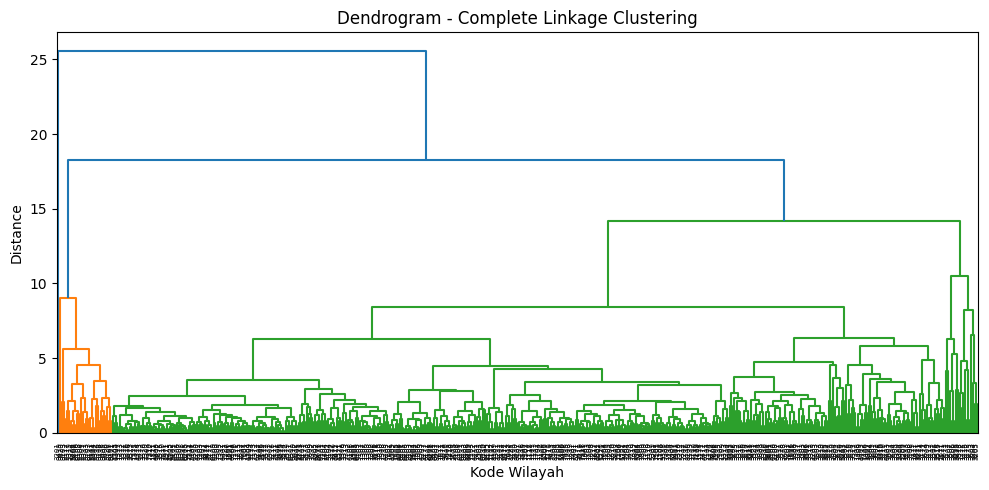

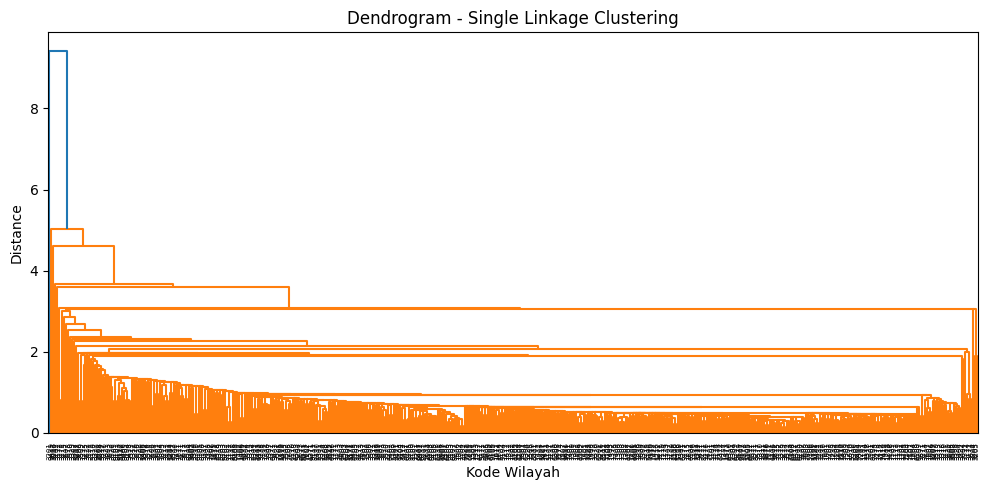

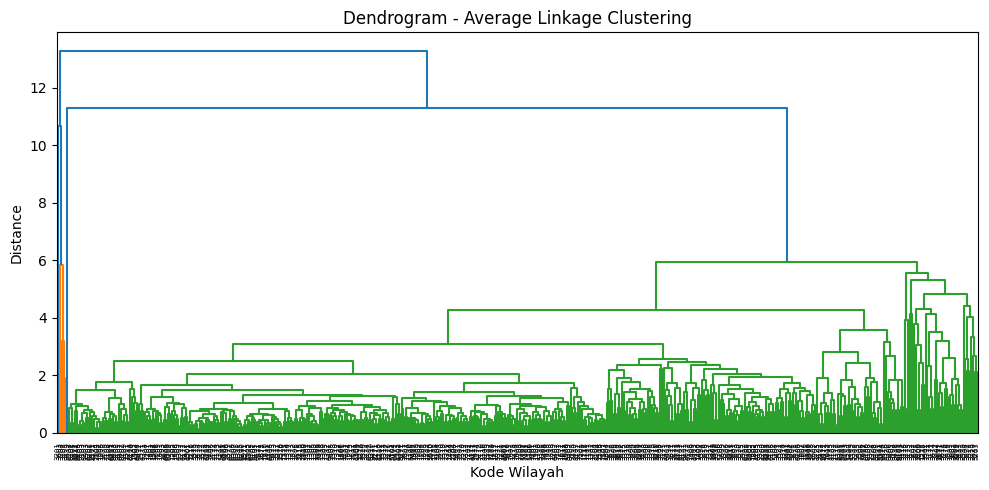

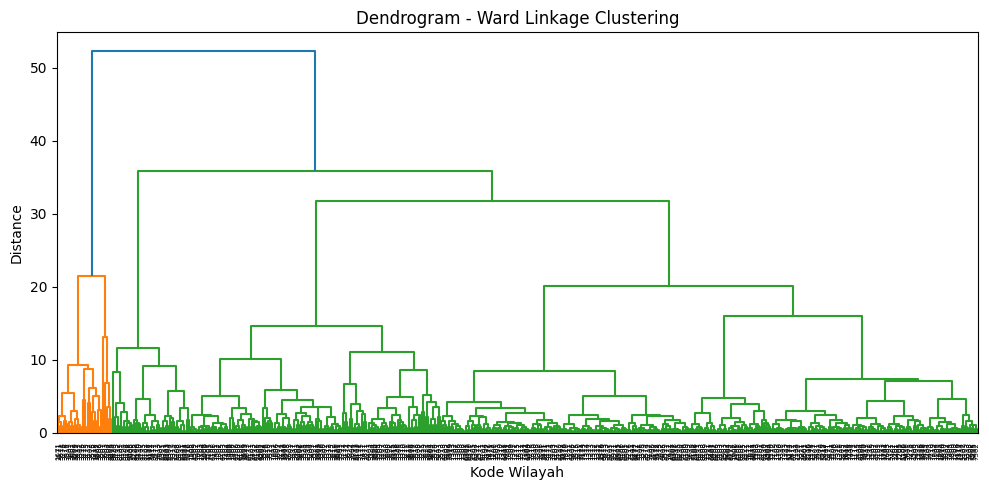

In [14]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# List metode linkage yang ingin diuji
methods = ['complete','single', 'average', 'ward']

# Loop untuk plot dendrogram tiap metode
for method in methods:
    plt.figure(figsize=(10, 5))
    linkage_matrix = linkage(data_norm, method=method)

    dendrogram(
        linkage_matrix,
        labels=df_cleaned['Kode Wilayah'].astype(str).values,
        leaf_rotation=90
    )
    plt.title(f"Dendrogram - {method.capitalize()} Linkage Clustering")
    plt.xlabel("Kode Wilayah")
    plt.ylabel("Distance")
    plt.tight_layout()
    plt.show()

In [15]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Daftar metode linkage
methods = ['complete', 'single', 'average', 'ward']

# Range jumlah cluster
num_clusters = range(2, 7)

# Simpan skor silhouette untuk visualisasi
silhouette_results = {}

for method in methods:
    # Buat linkage matrix
    linkage_matrix = linkage(data_norm, method=method)

    scores = []
    print(f"\nMethod: {method.capitalize()}")
    for k in num_clusters:
        # Cluster menggunakan fcluster
        clusters = fcluster(linkage_matrix, t=k, criterion='maxclust')

        # Hitung silhouette score
        score = silhouette_score(data_norm, clusters)
        scores.append(score)

        print(f"  Jumlah cluster = {k}, Silhouette Score: {score:.4f}")

    silhouette_results[method] = scores


Method: Complete
  Jumlah cluster = 2, Silhouette Score: 0.8288
  Jumlah cluster = 3, Silhouette Score: 0.4201
  Jumlah cluster = 4, Silhouette Score: 0.4462
  Jumlah cluster = 5, Silhouette Score: 0.4224
  Jumlah cluster = 6, Silhouette Score: 0.4032

Method: Single
  Jumlah cluster = 2, Silhouette Score: 0.8288
  Jumlah cluster = 3, Silhouette Score: 0.6886
  Jumlah cluster = 4, Silhouette Score: 0.6509
  Jumlah cluster = 5, Silhouette Score: 0.6191
  Jumlah cluster = 6, Silhouette Score: 0.5817

Method: Average
  Jumlah cluster = 2, Silhouette Score: 0.7378
  Jumlah cluster = 3, Silhouette Score: 0.6794
  Jumlah cluster = 4, Silhouette Score: 0.6560
  Jumlah cluster = 5, Silhouette Score: 0.4820
  Jumlah cluster = 6, Silhouette Score: 0.4805

Method: Ward
  Jumlah cluster = 2, Silhouette Score: 0.5923
  Jumlah cluster = 3, Silhouette Score: 0.4289
  Jumlah cluster = 4, Silhouette Score: 0.2886
  Jumlah cluster = 5, Silhouette Score: 0.2905
  Jumlah cluster = 6, Silhouette Score: 0.

Jumlah cluster optimal yg terbentuk tiap metode (dilihat dari perpotongan silhuette score)
- Complete: 3
- Single: 3
- Average: 5
- Ward: 4

In [16]:
# Menyamakan indeks
data_cleaned = df_cleaned.loc[data_norm.index].copy()

# Threshold per metode
thresholds = {
    'complete': 17,
    'single': 4.7,
    'average': 5.9,
    'ward': 25
}

# Daftar metode linkage
methods = ['complete', 'single', 'average', 'ward']

In [17]:
from scipy.cluster.hierarchy import linkage, fcluster

# Hasil Clustering
for method in methods:
    print(f"\n=== Clustering dengan metode {method.capitalize()} ===")

    # Ambil threshold sesuai metode
    threshold = thresholds[method]

    # Buat linkage matrix
    linkage_matrix = linkage(data_norm, method=method)

    # Tentukan cluster berdasarkan threshold
    clusters = fcluster(linkage_matrix, t=threshold, criterion='distance')

    # Gabungkan hasil cluster ke data asli
    data_clustered = data_cleaned.copy()
    data_clustered['Cluster'] = clusters

    # Kelompokkan dan cetak hasil per cluster
    cluster_groups = data_clustered.groupby("Cluster")["Kode Wilayah"].apply(lambda x: ", ".join(map(str, x.unique()))).reset_index()
    for idx, row in cluster_groups.iterrows():
        print(f"Cluster {row['Cluster']} : {row['Kode Wilayah']}")


=== Clustering dengan metode Complete ===
Cluster 1 : 1224, 5208, 5301, 5302, 5303, 5304, 5305, 5308, 5311, 5314, 5316, 5317, 5319, 5320, 8103, 8105, 8106, 8108, 9101, 9103, 9104, 9111, 9112, 9405, 9406, 9418, 9419, 9420
Cluster 2 : 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1171, 1172, 1173, 1174, 1175, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1225, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1471, 1472, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1571, 1572, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1671, 1672, 1673, 1674, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1771, 1801, 1802, 1803, 1804

Di bwh ini ada pairplot (kyk kumpulan visualisasi antar 2 fitur) buat justifikasi apakah dengan pembagian cluster segitu (Complete: 3, Single: 3, Average: 5, Ward: 4) cluster-nya terpisah jelas atau justru tumpang tindih


Visualisasi pairplot untuk metode: Complete


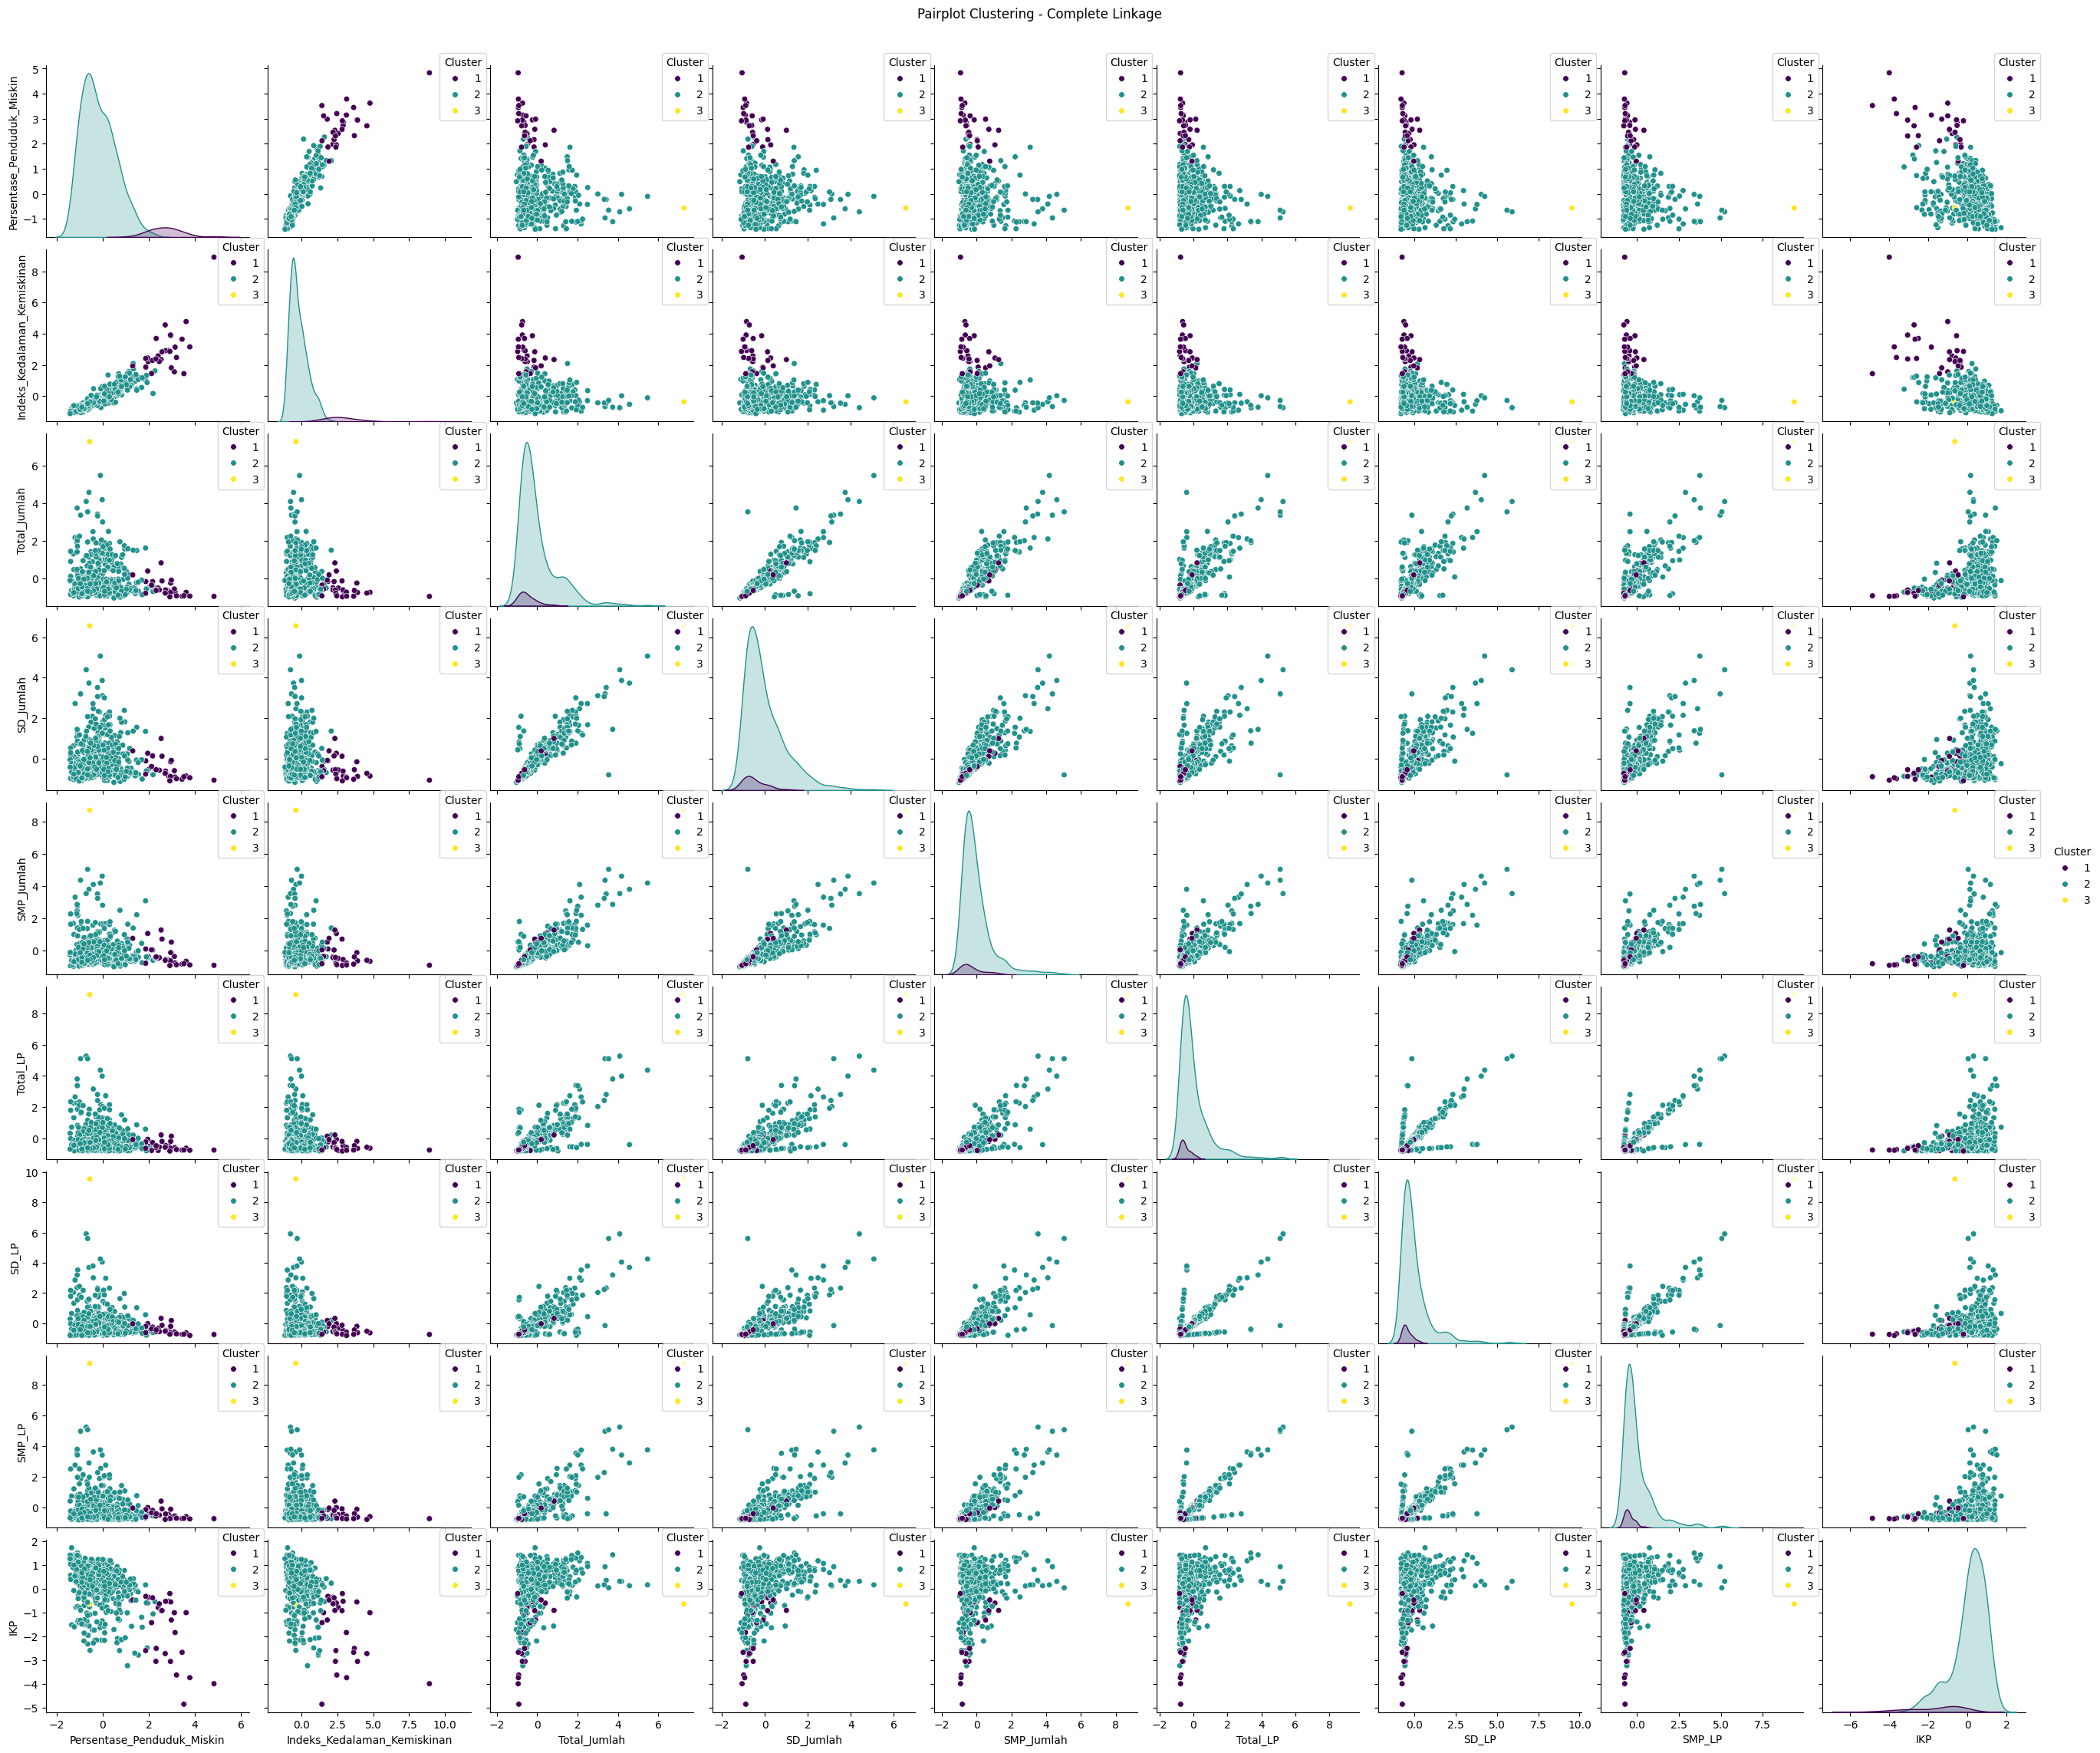


Visualisasi pairplot untuk metode: Single


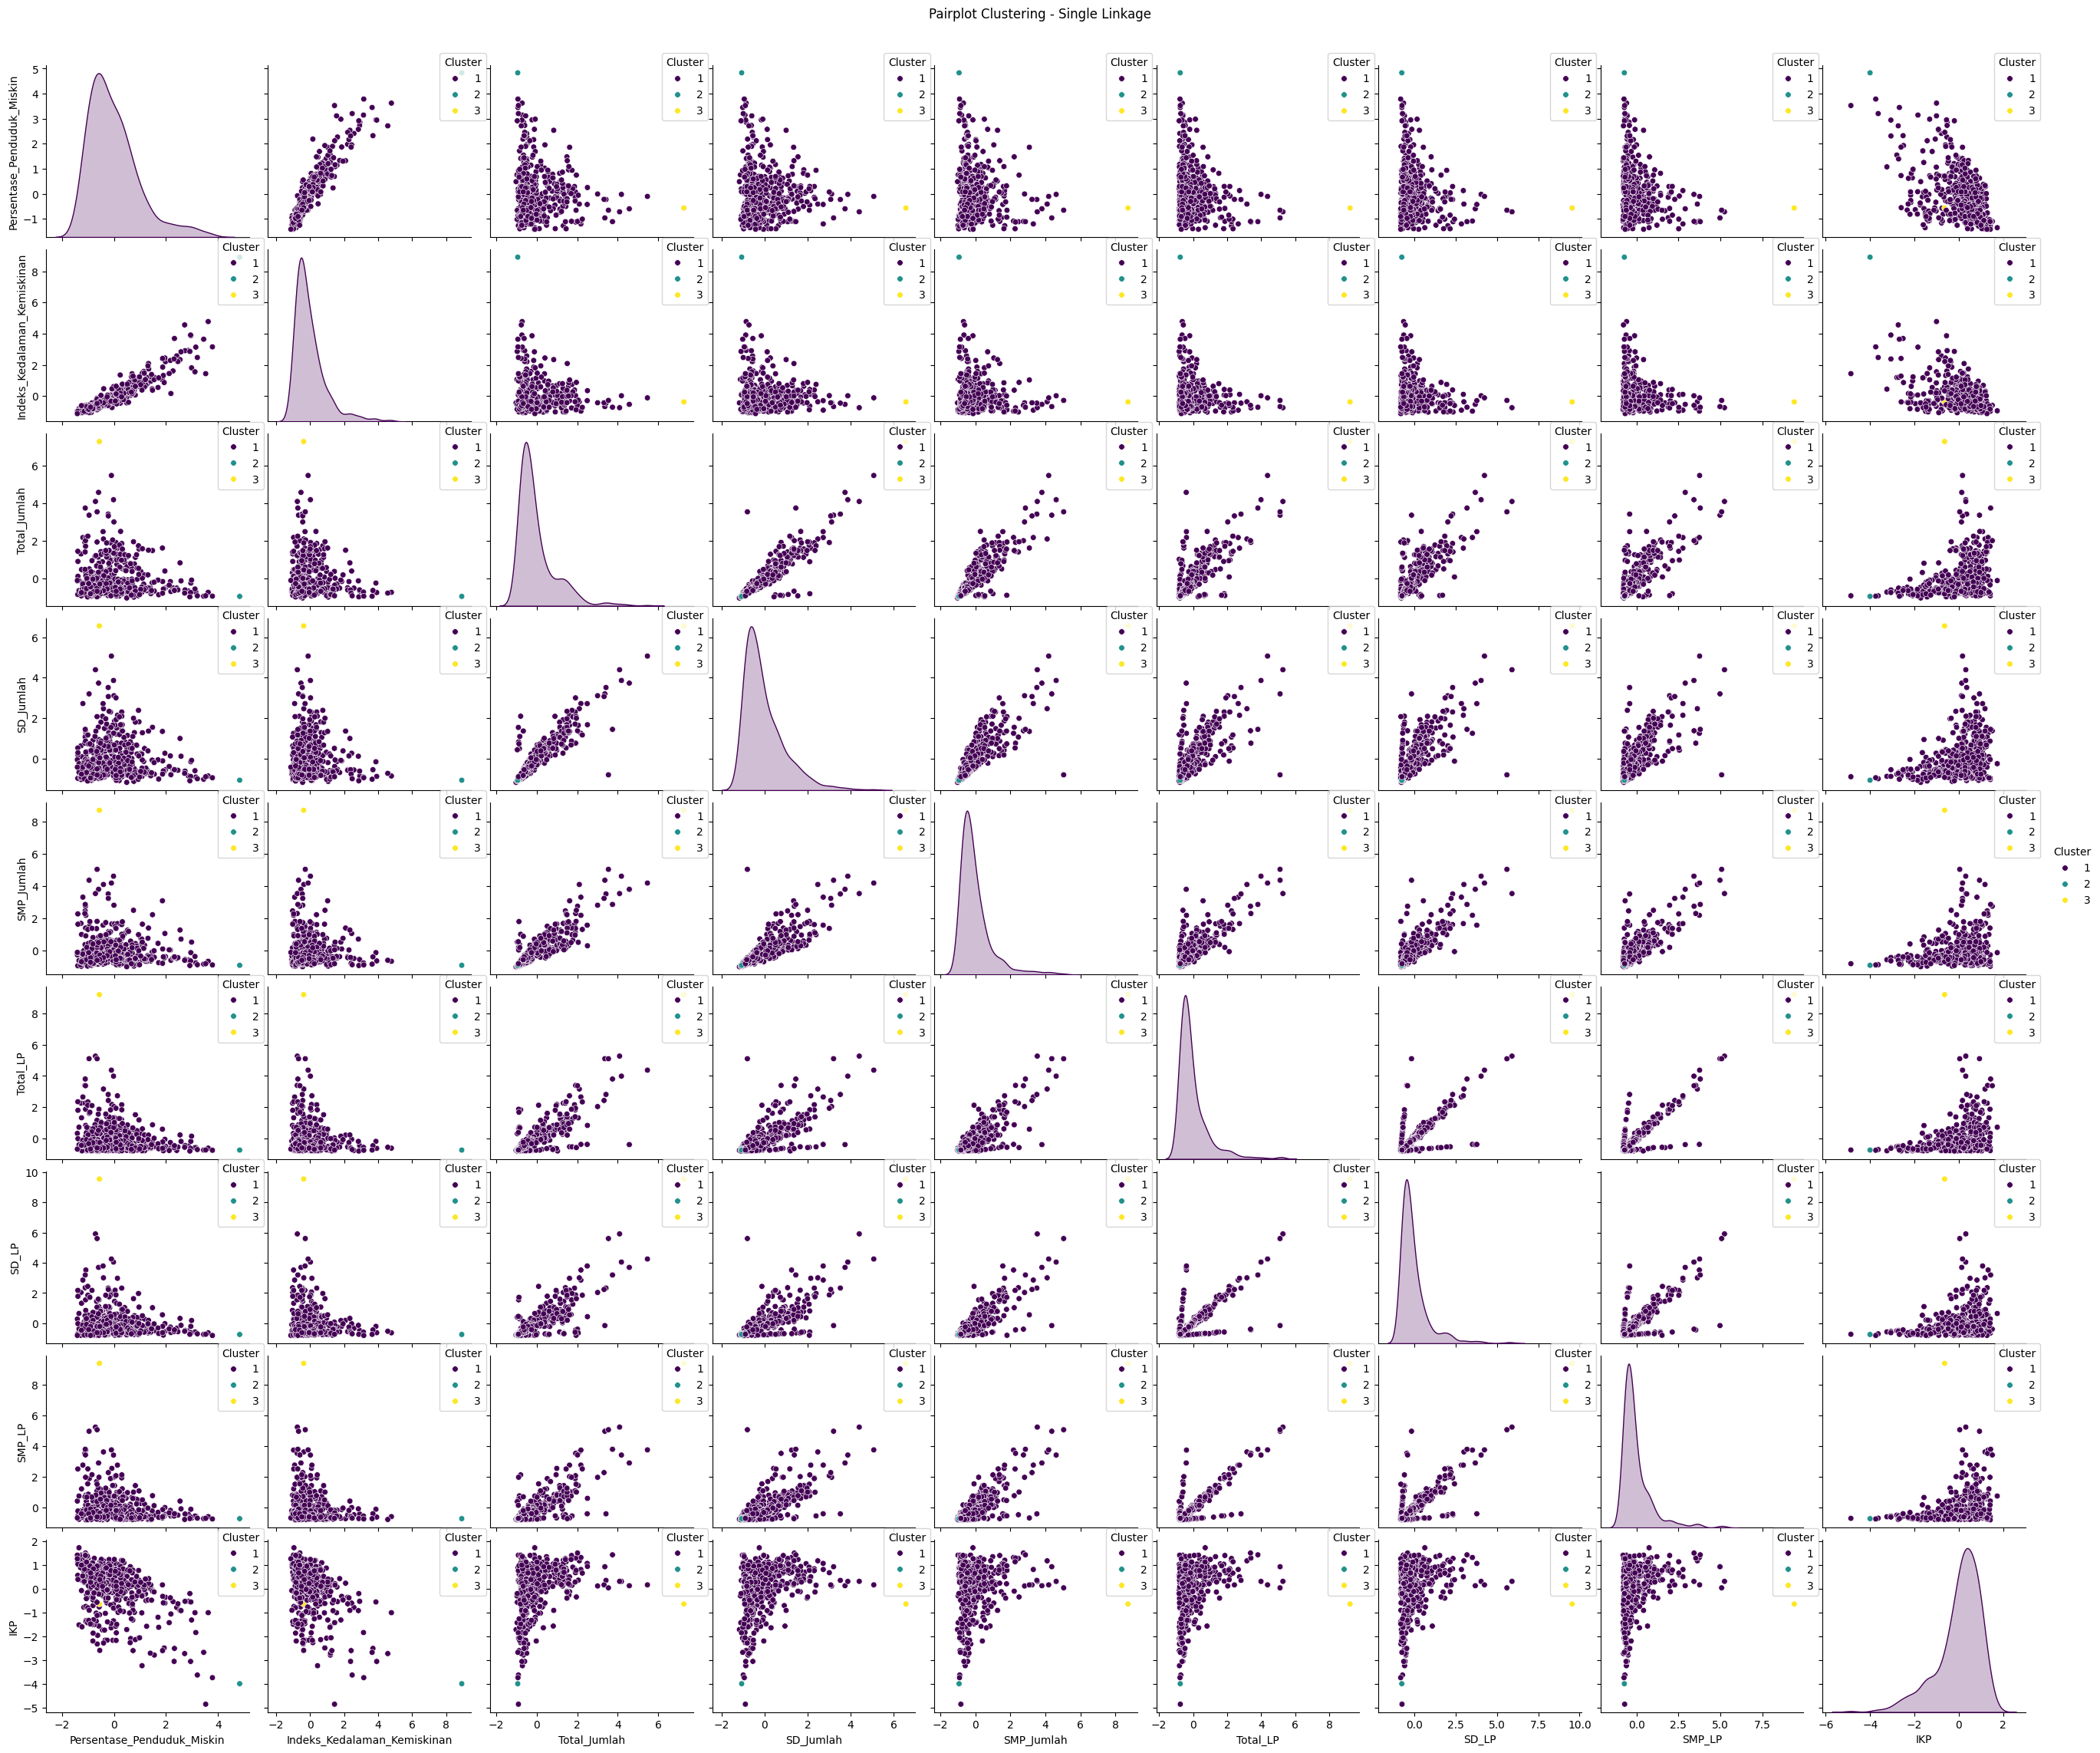


Visualisasi pairplot untuk metode: Average


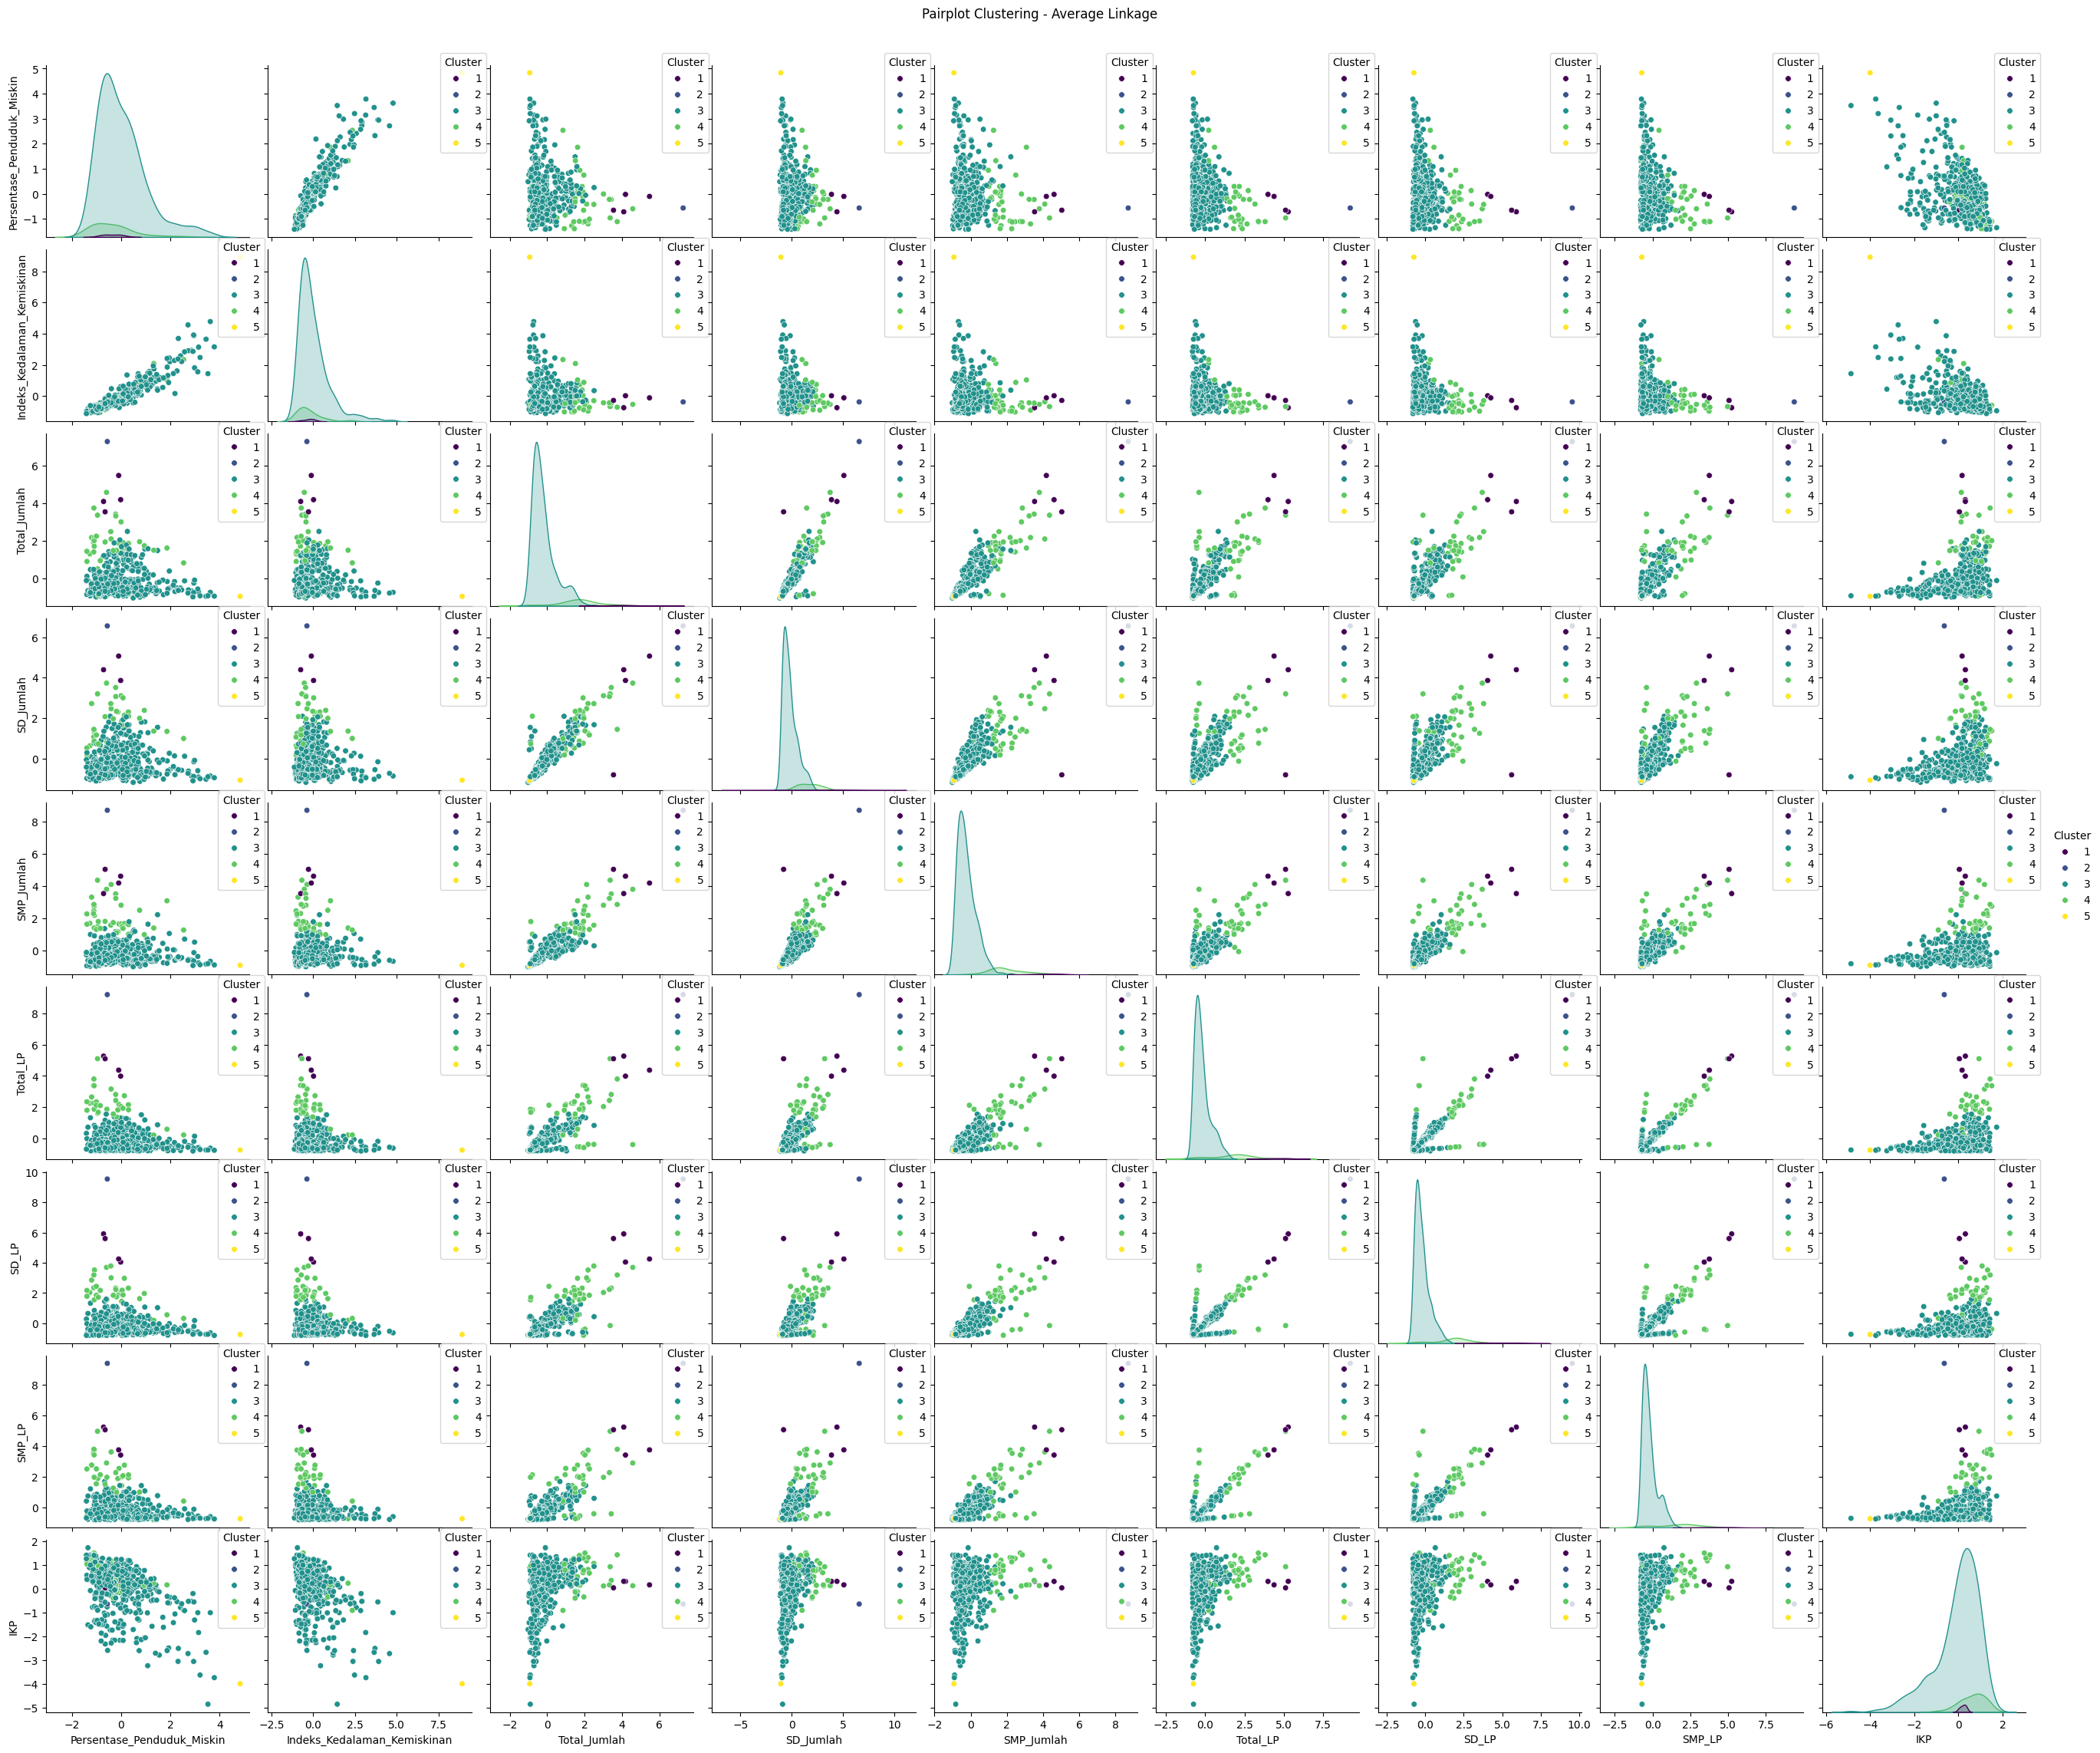


Visualisasi pairplot untuk metode: Ward


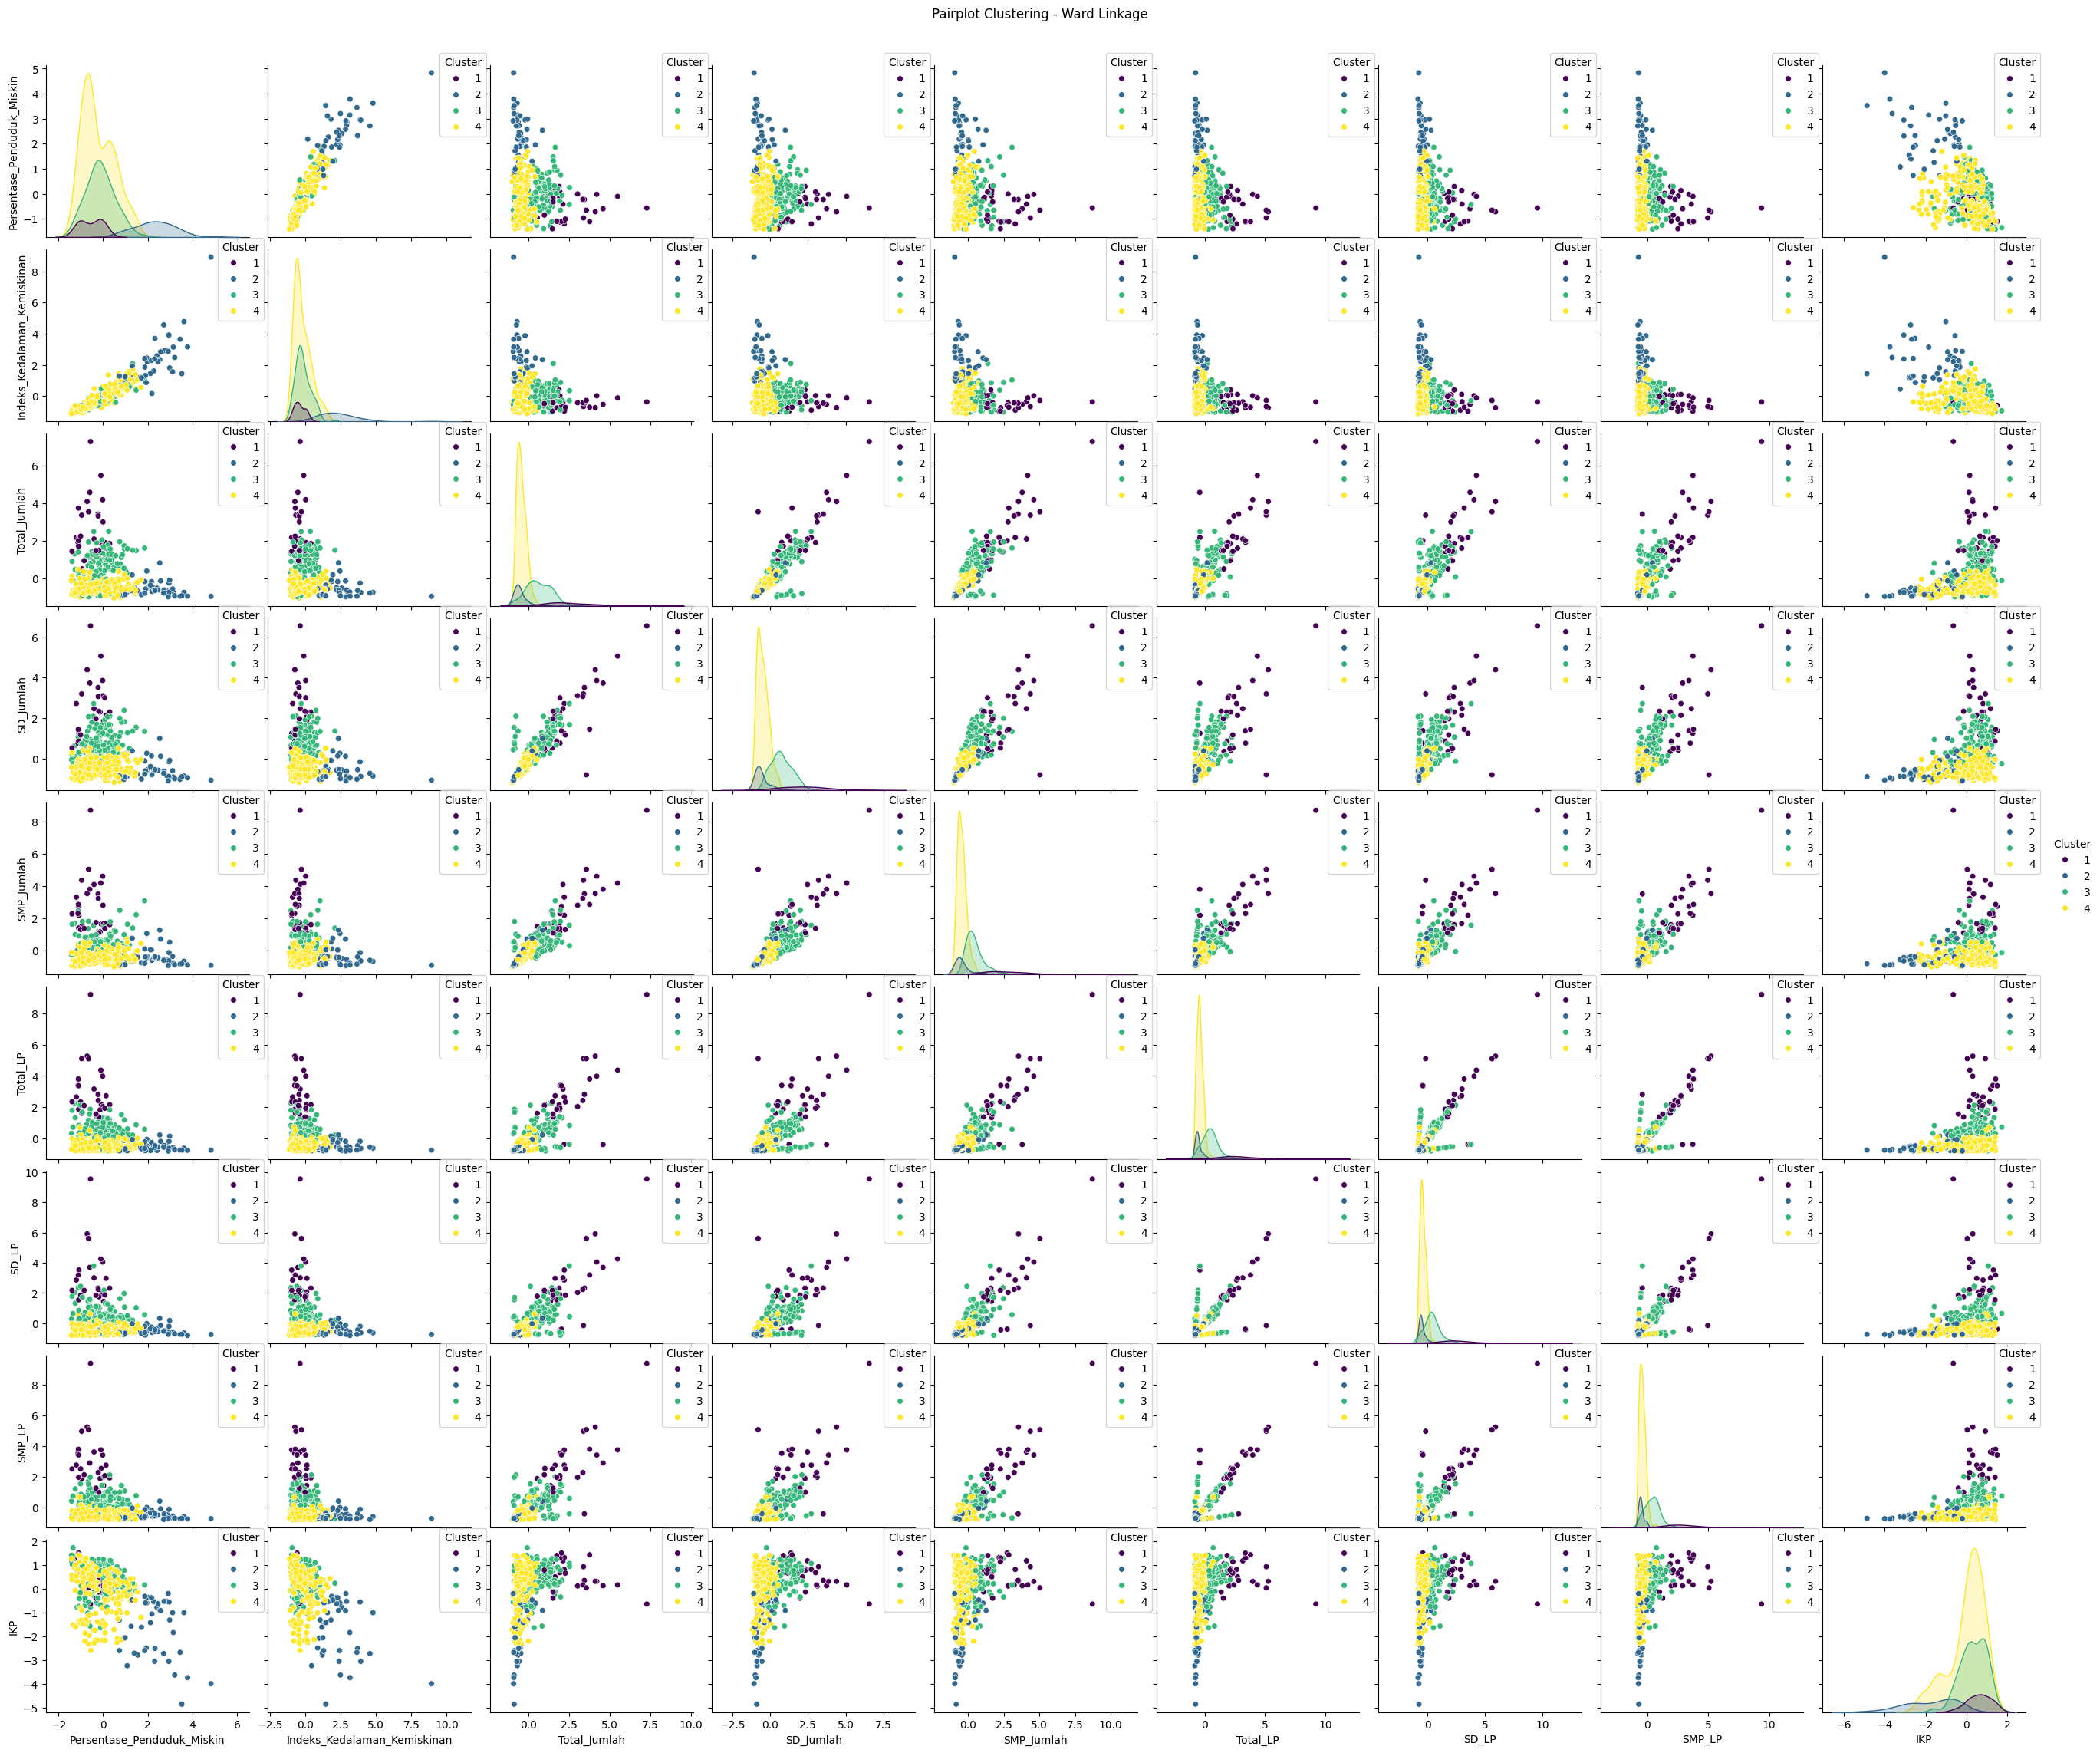

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster

for method in methods:
    print(f"\nVisualisasi pairplot untuk metode: {method.capitalize()}")

    # Buat linkage matrix dan cluster
    linkage_matrix = linkage(data_norm, method=method)
    threshold = thresholds[method]
    clusters = fcluster(linkage_matrix, t=threshold, criterion='distance')

    # Salin data_norm dan tambahkan kolom Cluster
    df_plot = data_norm.copy()
    df_plot["Cluster"] = clusters

    # Pairplot
    pairplot = sns.pairplot(df_plot, hue="Cluster", palette="viridis",
                             plot_kws={'s': 30}, height=2.5, aspect=1.2)

    plt.suptitle(f"Pairplot Clustering - {method.capitalize()} Linkage", y=1.02)

    # Styling legend (optional)
    for ax in pairplot.axes.flatten():
        if ax is not None:
            handles, labels = ax.get_legend_handles_labels()
            if len(handles) > 0:
                ax.legend(title="Cluster", loc="upper right", bbox_to_anchor=(1.1, 1.1))

    plt.show()

- Complete Linkage

Cluster  cukup terpisah rapi dan seimbang secara visual, tidak terlalu overlap. Cluster 3 sangat terpisah dari yang lain. Berarti anggota cluster 3 sangat berbeda dibanding cluster lainnya.

- Single Linkage

Banyak titik data menumpuk dalam satu cluster besar, membuat cluster lain tampak seperti outlier. Ini ciri khas dari chaining effect pada single linkage (menghubungkan titik terdekat, sering menyebabkan hasil tidak kompak).

-  Average dan Ward Linkage

Beberapa cluster masih agak tumpang tindih, terutama pada dimensi dengan korelasi tinggi.

In [19]:
import numpy as np

# Simpan hasil evaluasi tiap metode
hasil_evaluasi = []

for method in methods:
    print(f"\n=== Clustering dengan metode {method.capitalize()} ===")

    # Ambil threshold sesuai metode
    threshold = thresholds[method]

    # Buat linkage matrix
    linkage_matrix = linkage(data_norm, method=method)

    # Tentukan cluster berdasarkan threshold
    clusters = fcluster(linkage_matrix, t=threshold, criterion='distance')

    # Gabungkan hasil cluster ke data asli
    data_clustered = data_cleaned.copy()
    data_clustered['Cluster'] = clusters

    # --- Hitung Sw ---
    sw_per_cluster = []
    for clust_id in np.unique(clusters):
        cluster_data = data_norm[data_clustered['Cluster'] == clust_id]
        if len(cluster_data) > 1:
            cluster_std = cluster_data.std().mean()  # std semua fitur lalu dirata-rata
            sw_per_cluster.append(cluster_std)
        else:
            # Kalau hanya 1 data, skip (tidak bisa dihitung std)
            continue
    if len(sw_per_cluster) > 0:
        Sw = np.mean(sw_per_cluster)
    else:
        Sw = np.nan

    # --- Hitung Sb ---
    cluster_centroids = data_norm.groupby(clusters).mean()
    if len(cluster_centroids) > 1:
        Sb = cluster_centroids.std().mean()
    else:
        Sb = np.nan

    # --- Rasio ---
    rasio = Sw / Sb if not np.isnan(Sw) and not np.isnan(Sb) and Sb != 0 else np.nan

    # Simpan hasil ke list
    hasil_evaluasi.append({
        "Metode": method.capitalize(),
        "Sw": Sw,
        "Sb": Sb,
        "Sw/Sb": rasio
    })

    # Cetak hasil
    print(f"Sw      = {Sw:.5f}" if not np.isnan(Sw) else "Sw      = NaN")
    print(f"Sb      = {Sb:.5f}" if not np.isnan(Sb) else "Sb      = NaN")
    print(f"Sw/Sb   = {rasio:.6f}" if not np.isnan(rasio) else "Sw/Sb   = NaN")


=== Clustering dengan metode Complete ===
Sw      = 0.76962
Sb      = 3.84352
Sw/Sb   = 0.200239

=== Clustering dengan metode Single ===
Sw      = 0.93596
Sb      = 4.58518
Sw/Sb   = 0.204128

=== Clustering dengan metode Average ===
Sw      = 0.85317
Sb      = 3.45271
Sw/Sb   = 0.247103

=== Clustering dengan metode Ward ===
Sw      = 0.75974
Sb      = 1.40371
Sw/Sb   = 0.541237


Metode Hierarchical Clusterting yg paling optimal = **complete linkage** krn terlihat pemisahan yang jelas antar cluster dan ratio Sw/Sb terkecil (memiliki kinerja paling baik atau memiliki homogenitas tinggi dalam klasternya)

In [20]:
from scipy.cluster.hierarchy import linkage, fcluster

# Buat linkage matrix dengan metode Complete
linkage_matrix = linkage(data_norm, method='average')

# Bentuk cluster berdasarkan threshold (atau bisa pakai jumlah cluster)
# Kita tahu dari sebelumnya jumlah cluster optimal = 3
clusters = fcluster(linkage_matrix, t=5, criterion='maxclust')

# Gabungkan hasil cluster ke data
data_clustered = data_cleaned.copy()
data_clustered['Cluster'] = clusters

# Hitung centroid (rata-rata) tiap variabel numerik untuk setiap cluster
centroids = data_clustered.groupby("Cluster")[data_numerik.columns].mean()

# Tampilkan hasil centroid
print("\nCentroid Metode Average):")
centroids.round(2)


Centroid Metode Average):


Persentase_Penduduk_Miskin  Indeks_Kedalaman_Kemiskinan  \
Cluster                                                            
1                              8.14                         1.20   
2                              7.05                         1.08   
3                             10.39                         1.56   
4                              8.34                         1.27   
5                             37.72                        12.81   

         Total_Jumlah  SD_Jumlah  SMP_Jumlah    Total_LP      SD_LP  \
Cluster                                                               
1             4284.00    1067.00       434.5   634849.00  306462.75   
2             6616.00    1906.00       783.0  1157089.00  550266.00   
3              698.97     252.40        69.2    70593.56   31585.14   
4             2207.00     717.23       246.9   288388.26  136971.77   
5              119.00      40.00        14.0     8021.00    3906.00   

            SMP_LP    IKP  
Cluster                    
1        118674.00  79.46  
2        233787.00  70.01  
3         13564.34  76.61  
4         56500.38  84.22  
5          1828.00  32.69

**Interpretasi tiap cluster Complete Linkage:**

- 🟥 **Cluster 1 Prioritas Tertinggi**

Daerah miskin dengan ketahanan pangan rendah dan jumlah penduduk kecil. Penduduknya didominasi oleh kelompok berpendidikan rendah. Bisa jadi wilayah tertinggal atau terpencil.

- 🟨 **Cluster 2 Prioritas Menengah**


Wilayah berkembang dengan ketahanan pangan tinggi dan kemiskinan ringan. Punya populasi menengah dengan akses pendidikan dasar yang cukup baik.

- 🟩 **Cluster 3 Prioritas Rendah**

Tidak perlu menjadi fokus utama untuk distribusi MBG. Wilayah metropolitan atau urban besar yang sejahtera. Memiliki jumlah penduduk sangat besar, lapangan kerja luas, pendidikan dasar tersedia dalam jumlah besar, dan tingkat kemiskinan sangat rendah.

In [21]:
# Hasil clustering (tanpa wilayah dgn missing value)
data_clustered.head()

Kode Wilayah Nama Wilayah_kemiskinan  Persentase_Penduduk_Miskin  \
0          1101                Simeulue                       17.69   
1          1102            Aceh Singkil                       19.06   
2          1103            Aceh Selatan                       12.02   
3          1104           Aceh Tenggara                       11.99   
4          1105              Aceh Timur                       13.26   

   Indeks_Kedalaman_Kemiskinan Nama Wilayah_sekolah  Total_Jumlah  SD_Jumlah  \
0                         2.62             Simeulue         344.0      115.0   
1                         3.06         Aceh Singkil         343.0      113.0   
2                         1.57         Aceh Selatan         707.0      206.0   
3                         1.64        Aceh Tenggara         625.0      187.0   
4                         2.04           Aceh Timur         815.0      293.0   

   SMP_Jumlah   Nama Wilayah  Total_LP    SD_LP   SMP_LP Nama Wilayah_ikp  \
0        46.0       Simeulue   20919.0   9672.0    396.0         Simeulue   
1        54.0   Aceh Singkil   34127.0  16956.0   7045.0     Aceh Singkil   
2        63.0   Aceh Selatan    4855.0  19993.0    896.0     Aceh Selatan   
3        87.0  Aceh Tenggara   53593.0  24297.0  11048.0    Aceh Tenggara   
4        87.0     Aceh Timur   94202.0  45045.0  15205.0       Aceh Timur   

     IKP  Cluster  
0  77.54        3  
1  46.10        3  
2  73.84        3  
3  76.87        3  
4  77.19        3

**Kalo mau coba2 jumlah clusternya lain, tinggal ganti thresholdnya, ada setelah silhouette score**

# K-Means

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_k = range(2, 7)
silhouette_scores = []

print("Silhouette Score untuk KMeans:")
for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_norm)
    score = silhouette_score(data_norm, labels)
    silhouette_scores.append(score)
    print(f"  Jumlah cluster = {k}, Silhouette Score: {score:.4f}")

Silhouette Score untuk KMeans:
  Jumlah cluster = 2, Silhouette Score: 0.4650
  Jumlah cluster = 3, Silhouette Score: 0.3566
  Jumlah cluster = 4, Silhouette Score: 0.3478
  Jumlah cluster = 5, Silhouette Score: 0.2531
  Jumlah cluster = 6, Silhouette Score: 0.2523


In [23]:
# Misal pakai k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters_kmeans = kmeans.fit_predict(data_norm)

# Tambahkan cluster ke data
data_kmeans = data_cleaned.copy()
data_kmeans['Cluster'] = clusters_kmeans + 1  # +1 biar clusternya mulai dari 1, sama kayak fcluster

# Kelompokkan dan cetak hasil per cluster
print(f"\n=== Clustering dengan metode KMeans (k={k}) ===")
cluster_groups = data_kmeans.groupby("Cluster")["Kode Wilayah"].apply(lambda x: ", ".join(map(str, x.unique()))).reset_index()

for idx, row in cluster_groups.iterrows():
    print(f"Cluster {row['Cluster']} : {row['Kode Wilayah']}")


=== Clustering dengan metode KMeans (k=3) ===
Cluster 1 : 1103, 1104, 1105, 1108, 1110, 1114, 1116, 1171, 1173, 1174, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1210, 1211, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1271, 1272, 1273, 1274, 1276, 1277, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1401, 1402, 1403, 1404, 1405, 1407, 1408, 1409, 1472, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1571, 1572, 1601, 1603, 1604, 1605, 1608, 1609, 1610, 1611, 1612, 1672, 1673, 1674, 1702, 1703, 1706, 1707, 1708, 1709, 1771, 1801, 1802, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1872, 1901, 1902, 1903, 1904, 1905, 1906, 1971, 2101, 2102, 2103, 2104, 2105, 2172, 3101, 3173, 3208, 3218, 3272, 3274, 3277, 3278, 3279, 3303, 3306, 3307, 3309, 3311, 3313, 3316, 3317, 3319, 3321, 3323, 3325, 3326, 3371, 3372, 3373, 3375, 3376, 3401, 3402, 3403, 3471, 3501, 3502, 3503, 3511, 3512, 3516, 3518, 3519, 3520, 3521,

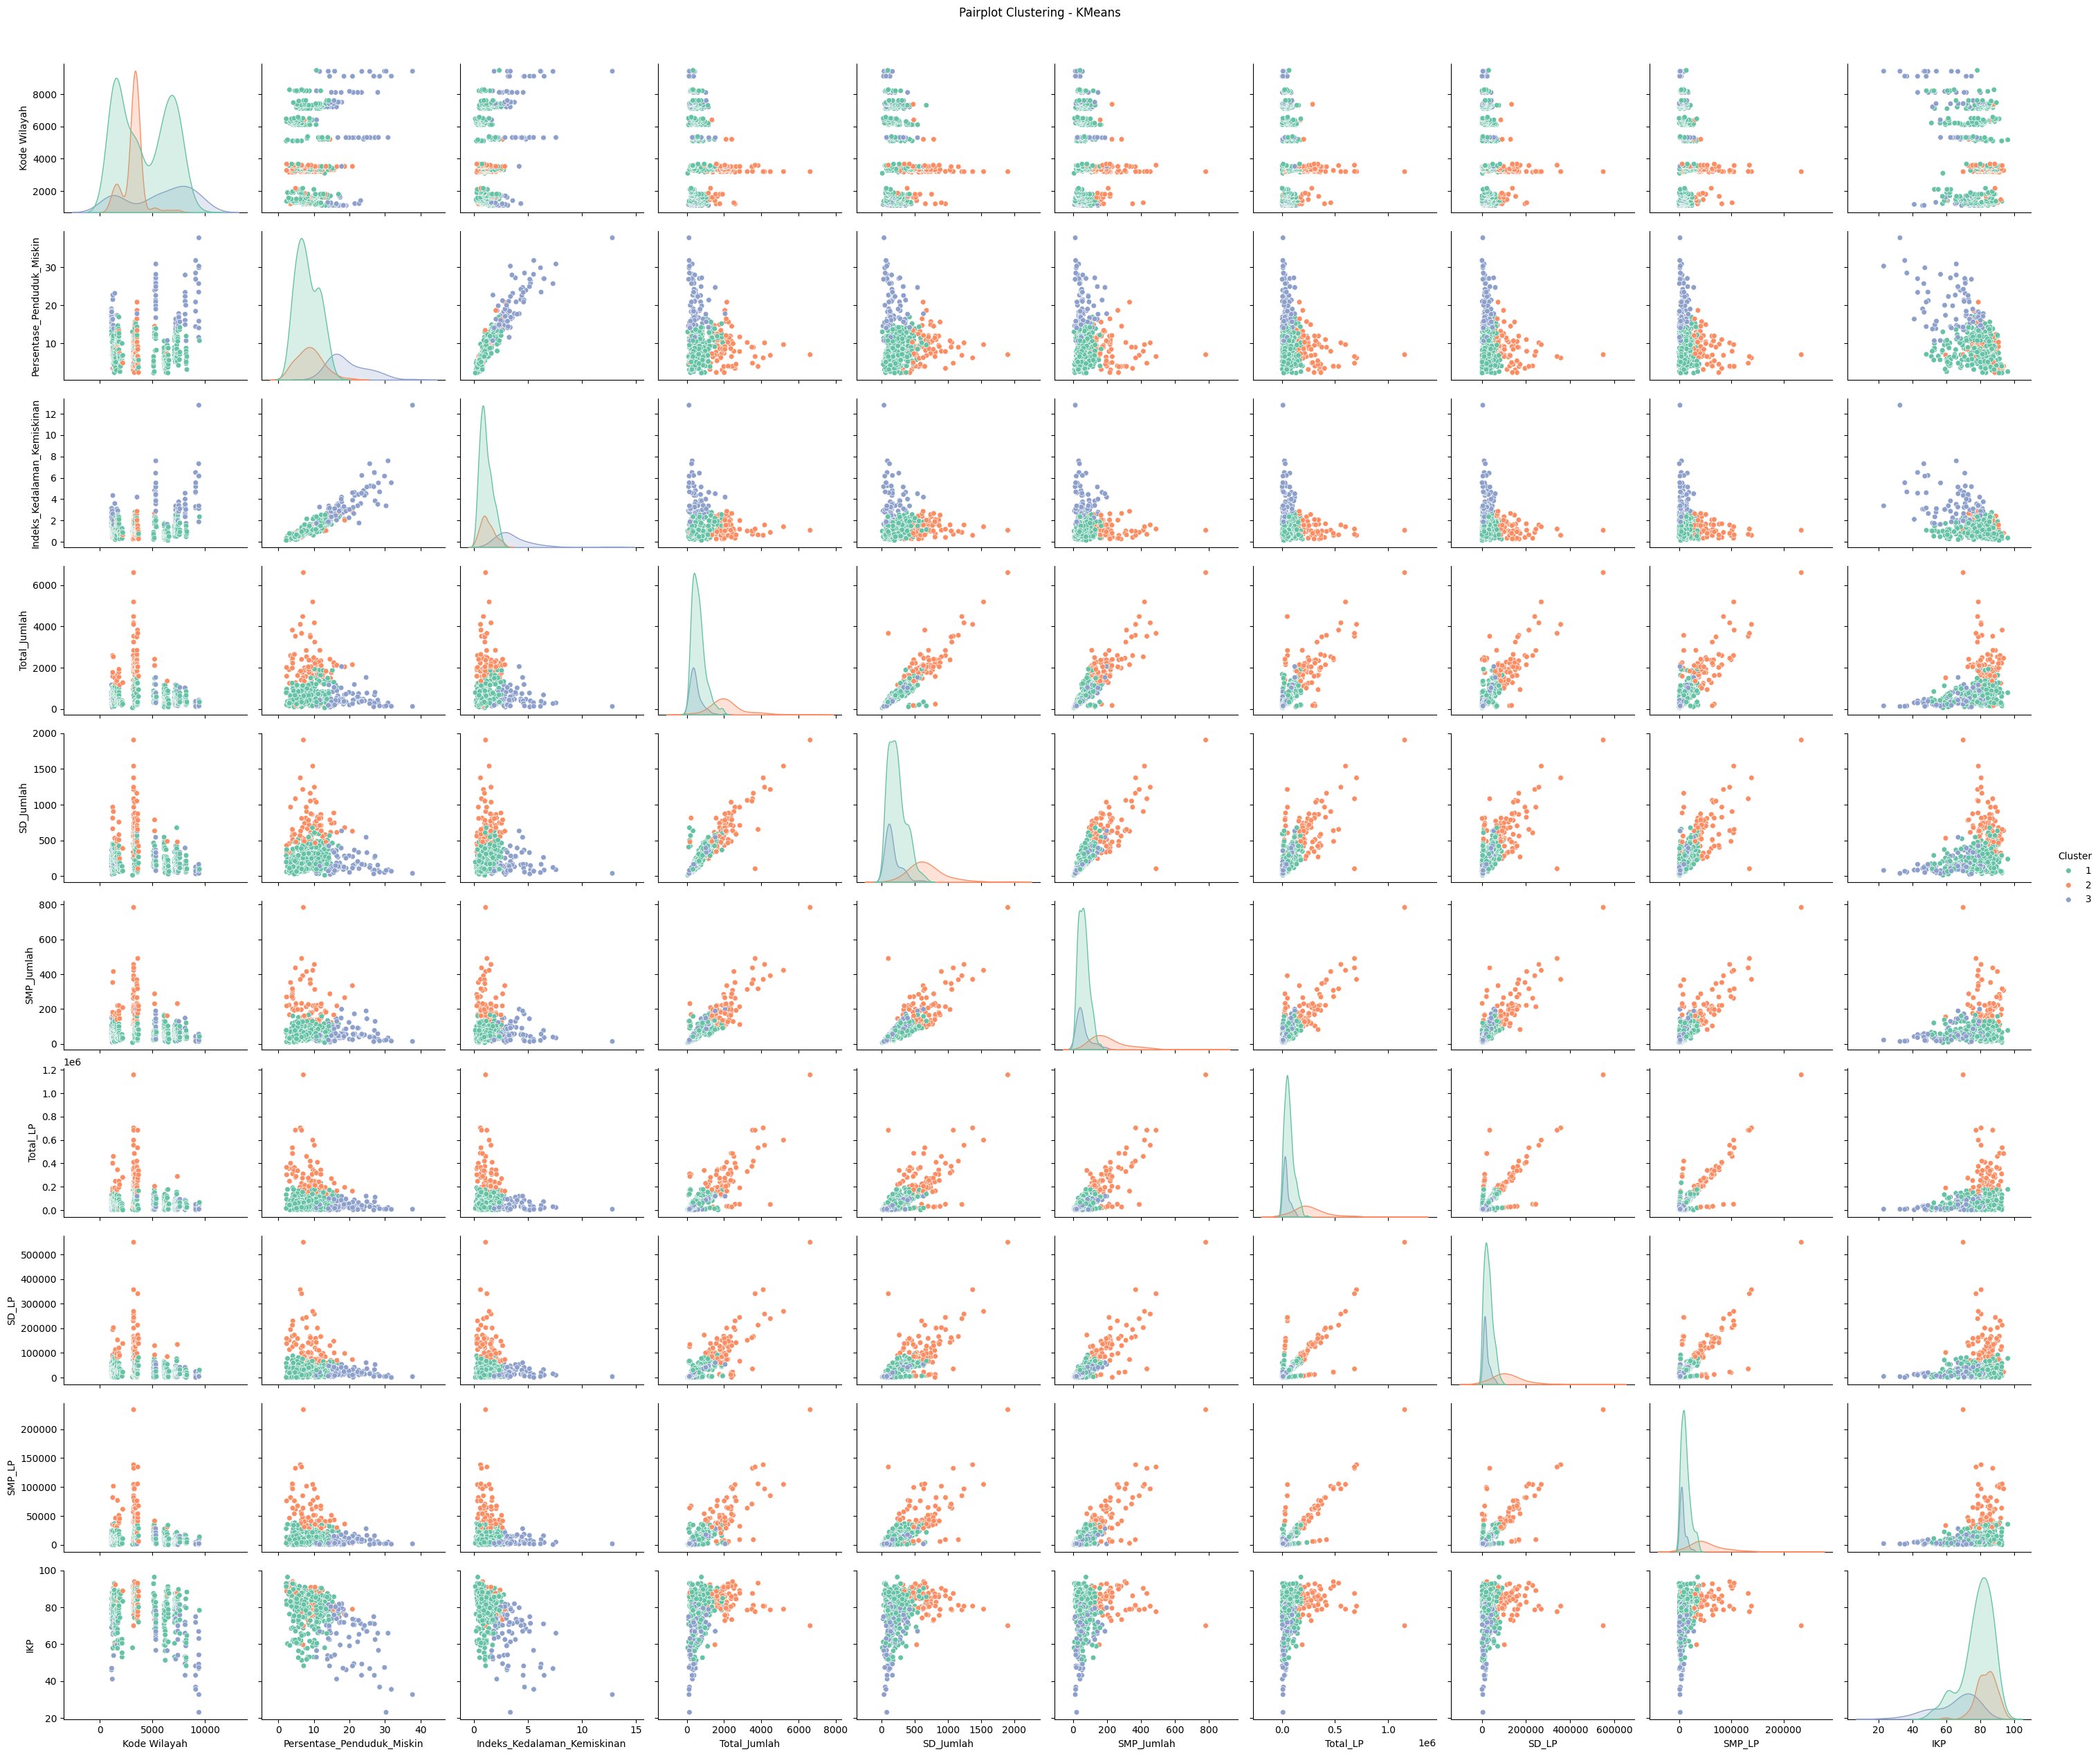

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data_kmeans, hue='Cluster', palette='Set2',
             plot_kws={'s': 30}, height=2.5, aspect=1.2)
plt.suptitle("Pairplot Clustering - KMeans", y=1.02)
plt.show()

Berdasarkan pairplot, cluster yg terbentuk cukup tumpang tindih

In [25]:
import numpy as np

# --- Hitung Sw ---
sw_per_cluster = []
for clust_id in np.unique(clusters_kmeans):
    cluster_data = data_norm[data_kmeans['Cluster'] == clust_id]
    if len(cluster_data) > 1:
        cluster_std = cluster_data.std().mean()
        sw_per_cluster.append(cluster_std)

Sw = np.mean(sw_per_cluster) if sw_per_cluster else np.nan

# --- Hitung Sb ---
cluster_centroids = data_norm.groupby(clusters_kmeans).mean()
Sb = cluster_centroids.std().mean() if len(cluster_centroids) > 1 else np.nan

# --- Rasio ---
rasio = Sw / Sb if not np.isnan(Sw) and not np.isnan(Sb) and Sb != 0 else np.nan

print("\nEvaluasi KMeans:")
print(f"Sw      = {Sw:.5f}" if not np.isnan(Sw) else "Sw      = NaN")
print(f"Sb      = {Sb:.5f}" if not np.isnan(Sb) else "Sb      = NaN")
print(f"Sw/Sb   = {rasio:.6f}" if not np.isnan(rasio) else "Sw/Sb   = NaN")


Evaluasi KMeans:
Sw      = 0.80683
Sb      = 1.08861
Sw/Sb   = 0.741157


In [26]:
# Hitung centroid (rata-rata) tiap variabel untuk setiap cluster
centroids_kmeans = data_kmeans.groupby("Cluster")[data_numerik.columns].mean()

# Tampilkan hasil
print("\nCentroid KMeans:")
centroids_kmeans.round(3)


Centroid KMeans:


Persentase_Penduduk_Miskin  Indeks_Kedalaman_Kemiskinan  \
Cluster                                                            
1                             8.185                        1.110   
2                             8.894                        1.254   
3                            19.573                        3.571   

         Total_Jumlah  SD_Jumlah  SMP_Jumlah    Total_LP       SD_LP  \
Cluster                                                                
1             620.267    231.673      62.591   63417.358   28539.915   
2            2152.548    685.940     212.060  270206.262  123218.702   
3             475.060    168.060      58.952   37936.976   19196.627   

            SMP_LP     IKP  
Cluster                     
1        12050.802  78.599  
2        53298.702  83.559  
3         6902.301  65.045

**Interpretasi tiap cluster K-Means:**

- 🟨 **Cluster 1 Prioritas Menengah (Wilayah Berkembang)**

Cluster ini mencerminkan wilayah berkembang dengan tingkat kemiskinan yang sedang dan ketahanan pangan yang cukup baik, walau belum optimal. Jumlah penduduk berada pada kategori menengah, dengan akses pendidikan yang mulai tersedia namun belum merata.

- 🟩 **Cluster 2 Prioritas Rendah (Wilayah Maju)**

Cluster ini terdiri dari wilayah-wilayah dengan jumlah penduduk yang sangat besar, akses pendidikan yang luas, serta tingkat kemiskinan yang rendah. Ketahanan pangan juga berada pada posisi paling tinggi di antara semua cluster. Gambaran ini menunjukkan wilayah metropolitan atau urban besar yang sudah relatif sejahtera. Intervensi MBG untuk cluster ini bisa diminimalkan, karena bukan menjadi fokus utama dalam prioritas distribusi sumber daya.

- 🟥 **Cluster 3 Prioritas Tertinggi (Wilayah Rentan)**

Wilayah dalam cluster ini ditandai dengan tingkat kemiskinan yang paling tinggi, baik dari sisi persentase penduduk miskin maupun kedalaman kemiskinan. Ketahanan pangan sangat rendah (IKP terendah), dan jumlah penduduk serta fasilitas pendidikan juga tergolong minim. Hal ini mengindikasikan daerah yang kemungkinan terpencil, tertinggal, atau sulit dijangkau, dengan akses terbatas terhadap layanan dasar. Wilayah-wilayah dalam cluster ini menjadi prioritas utama dalam intervensi program MBG dan pembangunan sosial.

**Kalo mau coba2 jumlah clusternya lain, tinggal ganti k, ada setelah silhouette score**

Berdasarkan pairplot, metode **hierarchical clusterting complete linkage** yg paling optimal krn terlihat pemisahan yang jelas antar cluster dan juga memiliki ratio Sw/Sb terkecil (memiliki kinerja paling baik atau memiliki homogenitas tinggi dalam klasternya)



# Multiscale Bootstrap Validation

Multiscale Bootstrap Results:
            0.5  0.6  0.7  0.8  0.9  1.0  1.1  1.2
2 clusters  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
3 clusters  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
4 clusters  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
5 clusters  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

Approximated AU p-values:
2 clusters    1.0
3 clusters    1.0
4 clusters    1.0
5 clusters    1.0
dtype: float64


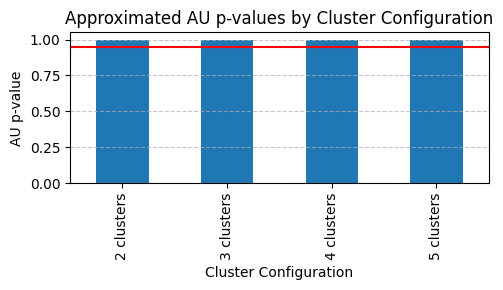

In [27]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.utils import resample
import matplotlib.pyplot as plt

def multiscale_bootstrap(data, n_bootstrap=100, scales=[0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2],
                         method='average', max_clusters=5):
    """
    Perform multiscale bootstrap validation for hierarchical clustering

    Parameters:
    -----------
    data : pandas DataFrame
        The normalized data used for clustering
    n_bootstrap : int
        Number of bootstrap samples for each scale
    scales : list
        List of proportions for resampling sizes
    method : str
        Linkage method for hierarchical clustering
    max_clusters : int
        Maximum number of clusters to evaluate

    Returns:
    --------
    DataFrame with AU p-values for each cluster configuration
    """
    results = {}
    n_samples, n_features = data.shape

    for scale in scales:
        # Calculate resampling size
        resample_size = int(n_samples * scale)

        cluster_counts = np.zeros(max_clusters - 1)  # For clusters 2 to max_clusters

        for i in range(n_bootstrap):
            # Bootstrap resample
            bootstrap_indices = resample(np.arange(n_samples), n_samples=resample_size)
            bootstrap_data = data.iloc[bootstrap_indices]

            # Perform hierarchical clustering
            Z = linkage(bootstrap_data, method=method)

            # Check each cluster configuration
            for k in range(2, max_clusters + 1):
                clusters = fcluster(Z, t=k, criterion='maxclust')

                # Check if original cluster structure is preserved
                if len(np.unique(clusters)) == k:
                    cluster_counts[k-2] += 1

        # Convert to proportions
        cluster_props = cluster_counts / n_bootstrap
        results[scale] = cluster_props

    # Convert results to DataFrame
    result_df = pd.DataFrame(results, index=[f"{i+2} clusters" for i in range(max_clusters-1)])

    # Calculate AU p-values (approximation)
    # AU values are approximated based on the frequency of occurrence across scales
    au_values = result_df.mean(axis=1)

    return result_df, au_values

# Usage example with your data
result_df, au_values = multiscale_bootstrap(data_norm, n_bootstrap=100, method='average')

print("Multiscale Bootstrap Results:")
print(result_df)
print("\nApproximated AU p-values:")
print(au_values)

# Visualize AU p-values
plt.figure(figsize=(5, 3))
au_values.plot(kind='bar')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.title('Approximated AU p-values by Cluster Configuration')
plt.ylabel('AU p-value')
plt.xlabel('Cluster Configuration')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Imputasi semua wilayah yang memiliki missing value

In [28]:
import pandas as pd
from functools import reduce
import numpy as np

# Load datasets
kemiskinan = pd.read_excel('kemiskinan.xlsx')
sekolah = pd.read_excel('Sekolah.xlsx')
anak_sekolah = pd.read_excel('JumlahAnakSekolah.xlsx')
IKP = pd.read_excel('IndeksKetahananPangan.xlsx')

# Print shape of each dataset to understand dimensions
print("Kemiskinan shape:", kemiskinan.shape)
print("Sekolah shape:", sekolah.shape)
print("Anak Sekolah shape:", anak_sekolah.shape)
print("IKP shape:", IKP.shape)

# Metode penggabungan secara sequential tanpa SPPG
df_merged = kemiskinan.merge(
    sekolah, on='Kode Wilayah', how='outer', suffixes=('_kemiskinan', '_sekolah')
).merge(
    anak_sekolah, on='Kode Wilayah', how='outer', suffixes=('', '_anak_sekolah')
).merge(
    IKP, on='Kode Wilayah', how='outer', suffixes=('', '_ikp')
)

# Ganti semua 0 jadi NaN biar bisa dihapus sekaligus dengan dropna
df_merged = df_merged.replace(0, np.nan)
missing_values = df_merged.isnull().sum()
print(f"Jumlah missing values tiap kolom\n", missing_values)

baris_missing = df_merged[df_merged.isnull().any(axis=1)]
print(f"\nWilayah dengan missing value:")
baris_missing.head()

Kemiskinan shape: (540, 4)
Sekolah shape: (540, 5)
Anak Sekolah shape: (540, 5)
IKP shape: (540, 3)
Jumlah missing values tiap kolom
 Kode Wilayah                    0
Nama Wilayah_kemiskinan         0
Persentase_Penduduk_Miskin     26
Indeks_Kedalaman_Kemiskinan    26
Nama Wilayah_sekolah            0
Total_Jumlah                   26
SD_Jumlah                      26
SMP_Jumlah                     26
Nama Wilayah                    0
Total_LP                       29
SD_LP                          29
SMP_LP                         29
Nama Wilayah_ikp                0
IKP                            26
dtype: int64

Wilayah dengan missing value:


Kode Wilayah Nama Wilayah_kemiskinan  Persentase_Penduduk_Miskin  \
317          6104               Pontianak                        4.83   
449          7605            Mamuju Utara                        5.21   
451          8101   Maluku Tenggara Barat                       23.66   
477          9106          Sorong Selatan                         NaN   
478          9107                  Sorong                         NaN   

     Indeks_Kedalaman_Kemiskinan   Nama Wilayah_sekolah  Total_Jumlah  \
317                         0.49              Pontianak         630.0   
449                         0.66           Mamuju Utara         367.0   
451                         4.23  Maluku Tenggara Barat         347.0   
477                          NaN         Sorong Selatan           NaN   
478                          NaN                 Sorong           NaN   

     SD_Jumlah  SMP_Jumlah           Nama Wilayah  Total_LP  SD_LP  SMP_LP  \
317      171.0        78.0              Pontianak       NaN    NaN     NaN   
449      136.0        54.0           Mamuju Utara       NaN    NaN     NaN   
451      121.0        66.0  Maluku Tenggara Barat       NaN    NaN     NaN   
477        NaN         NaN         Sorong Selatan       NaN    NaN     NaN   
478        NaN         NaN                 Sorong       NaN    NaN     NaN   

       Nama Wilayah_ikp    IKP  
317            Mempawah  73.85  
449        Mamuju Utara  57.34  
451  Kepulauan Tanimbar  49.94  
477      Sorong Selatan  40.39  
478              Sorong  50.88

In [29]:
# List semua wilayah yang memiliki missing value (kecuali Tufts)
data_missing = df_merged[df_merged.isnull().any(axis=1)].copy()

# Iterasi setiap wilayah dengan missing value dan imputasi berdasarkan klaster terdekat
for index, row in data_missing.iterrows():
    # Identifikasi fitur yang hilang dan tersedia
    missing_cols = row.index[row.isnull()].tolist()
    available_feats = [col for col in data_numerik if col not in missing_cols]

    # Normalisasi fitur yang tersedia
    scaler_temp = StandardScaler().fit(data_cleaned[available_feats])
    uni_scaled = scaler_temp.transform(row[available_feats].values.reshape(1, -1))

    # Normalisasi centroid klaster untuk fitur yang tersedia
    centroids_scaled_temp = scaler_temp.transform(centroids[available_feats])

    # Hitung jarak Euclidean ke setiap centroid klaster
    distances = np.linalg.norm(centroids_scaled_temp - uni_scaled, axis=1)

    # Tentukan klaster terdekat
    closest_cluster = np.argmin(distances) + 1  # Label klaster dimulai dari 1

    # Simpan info klaster ke kolom baru
    data_missing.at[index, "Cluster"] = closest_cluster

    # Imputasi missing value menggunakan centroid klaster terdekat
    for col in missing_cols:
        data_missing.at[index, col] = centroids.loc[closest_cluster, col]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

In [30]:
# Gabungkan dengan data yang sudah dibersihkan untuk memastikan semua data lengkap
hasil_clustering = pd.concat([data_clustered, data_missing]).reset_index(drop=True)
hasil_clustering

Kode Wilayah Nama Wilayah_kemiskinan  Persentase_Penduduk_Miskin  \
0            1101                Simeulue                       17.69   
1            1102            Aceh Singkil                       19.06   
2            1103            Aceh Selatan                       12.02   
3            1104           Aceh Tenggara                       11.99   
4            1105              Aceh Timur                       13.26   
..            ...                     ...                         ...   
535          9704                Tolikara                       31.22   
536          9705        Mamberamo Tengah                       35.27   
537          9706                  Yalimo                       30.02   
538          9707                Yahukimo                       33.82   
539          9708      Pegunungan Bintang                       28.95   

     Indeks_Kedalaman_Kemiskinan Nama Wilayah_sekolah  Total_Jumlah  \
0                           2.62             Simeulue         344.0   
1                           3.06         Aceh Singkil         343.0   
2                           1.57         Aceh Selatan         707.0   
3                           1.64        Aceh Tenggara         625.0   
4                           2.04           Aceh Timur         815.0   
..                           ...                  ...           ...   
535                         2.79             Tolikara         142.0   
536                         5.10     Mamberamo Tengah          64.0   
537                         9.19               Yalimo         105.0   
538                         4.67             Yahukimo         295.0   
539                         6.10   Pegunungan Bintang         194.0   

     SD_Jumlah  SMP_Jumlah        Nama Wilayah  Total_LP    SD_LP   SMP_LP  \
0        115.0        46.0            Simeulue   20919.0   9672.0    396.0   
1        113.0        54.0        Aceh Singkil   34127.0  16956.0   7045.0   
2        206.0        63.0        Aceh Selatan    4855.0  19993.0    896.0   
3        187.0        87.0       Aceh Tenggara   53593.0  24297.0  11048.0   
4        293.0        87.0          Aceh Timur   94202.0  45045.0  15205.0   
..         ...         ...                 ...       ...      ...      ...   
535       77.0        25.0            Tolikara   26231.0  16481.0   5038.0   
536       35.0         9.0    Mamberamo Tengah    6536.0   4194.0   1452.0   
537       53.0        23.0              Yalimo   11682.0   7166.0   2926.0   
538      178.0        46.0            Yahukimo     724.0    551.0  11179.0   
539       98.0        27.0  Pegunungan Bintang   16588.0   9165.0   3721.0   

       Nama Wilayah_ikp        IKP  Cluster  
0              Simeulue  77.540000      3.0  
1          Aceh Singkil  46.100000      3.0  
2          Aceh Selatan  73.840000      3.0  
3         Aceh Tenggara  76.870000      3.0  
4            Aceh Timur  77.190000      3.0  
..                  ...        ...      ...  
535            Tolikara  76.607114      3.0  
536    Mamberamo Tengah  76.607114      3.0  
537              Yalimo  32.690000      5.0  
538            Yahukimo  76.607114      3.0  
539  Pegunungan Bintang  76.607114      3.0  

[540 rows x 15 columns]

In [31]:
missing_values = hasil_clustering.isnull().sum()
print(missing_values)

Kode Wilayah                   0
Nama Wilayah_kemiskinan        0
Persentase_Penduduk_Miskin     0
Indeks_Kedalaman_Kemiskinan    0
Nama Wilayah_sekolah           0
Total_Jumlah                   0
SD_Jumlah                      0
SMP_Jumlah                     0
Nama Wilayah                   0
Total_LP                       0
SD_LP                          0
SMP_LP                         0
Nama Wilayah_ikp               0
IKP                            0
Cluster                        0
dtype: int64


# Download hasil clustering

In [32]:
hasil_clustering.to_excel("hasil_clustering.xlsx", index=False)